# Table of Contents

<a class="anchor" id="top"></a>

** **

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    
   2.1 [Incoherencies](#2.1-Incoherencies) <br><br>
    
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)

   3.1 [Duplicates](#3.1-Duplicates) <br>
    
   3.2 [Feature Engineering](#3.2-Feature-Engineering) <br>
   
   &emsp; 3.2.1 [Data Type Conversions](#3.2.1-Data-Type-Conversions) <br>
   
   &emsp; 3.2.2 [Encoding](#3.2.2-Encoding) <br>
   
   &emsp; 3.2.3 [Other Transformations](#3.2.3-Other-Transformations) <br>
    
   &emsp; 3.2.4 [Unique Feature-Pair Analysis](#3.2.4-Unique-Feature-Pair-Analysis) <br> 

   3.3 [Train-Test Split](#3.3-Train-Test-Split) <br>
   
   3.4 [Missing Values](#3.4-Missing-Values) <br>
    
   3.5 [Outliers](#3.5-Outliers) <br>

   3.6 [Visualisations](#3.6-Visualisations) <br><br>
   
4. [Feature Selection](#4.-Feature-Selection) 

    4.1 [Scaling](#4.1-Scaling) <br>
    
    4.2 [Filter Based Methods](#4.2-Filter-Based-Methods) <br>

    4.3 [Wrapper Methods](#4.3-Wrapper-Methods) <br>
    
    4.4 [Embbeded Methods](#4.4-Embbeded-Methods) <br>
    
    4.5 [Hybrid Methods](#4.5-Hybrid-Methods) <br><br>
    
5. [Test](#5.-Test) <br>

    5.1 [Feature Engineering](#5.1-Feature-Engineering) <br>
    
    &emsp; 5.1.1 [Data Type Conversions](#5.1.1-Data-Type-Conversions) <br>
   
    &emsp; 5.1.2 [Encoding](#5.1.2-Encoding) <br>
   
    &emsp; 5.1.3 [Other Transformations](#5.1.3-Other-Transformations) <br>
     
    &emsp; 5.1.4 [Unique Feature-Pair Analysis](#5.1.4-Unique-Feature-Pair-Analysis) <br> 
    
    5.2 [Missing Values](#5.2-Missing-Values) <br>
    
    5.3 [Log Transformation](#5.3-Log-Transformation) <br>
    
    5.4 [Scaling](#5.4-Scaling) <br><br>

    
6. [Export](#6.-Export)


# 1. Importing Libraries & Data

In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Data Profiling 
# from ydata_profiling import ProfileReport

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import visualisations as v

# Preprocessing Functions
import preproc as p

# Train-Test Split
from sklearn.model_selection import train_test_split

# Scaling Techniques
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# Feature Selection Libraries
from sklearn.feature_selection import VarianceThreshold
import feature_selection as fs

# Models for Recursive Feature Elimination (RFE)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Label Encoder 
from sklearn.preprocessing import OrdinalEncoder

# Display Settings
pd.set_option('display.max_columns', None)

# Song Playing Function 
# import play_song as song

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
# Load training data
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')

# Print the first 3 rows of the training data
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

In [4]:
# The "include='object'" argument limits the description to only categorical data types.
# Transpose the result (.T) to display statistics in a more readable format with rows as columns.
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [5]:
# .describe provides statistical summaries for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [6]:
# Check the dimensions of the dataset (number of rows and columns)
df.shape

(593471, 32)

In [7]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

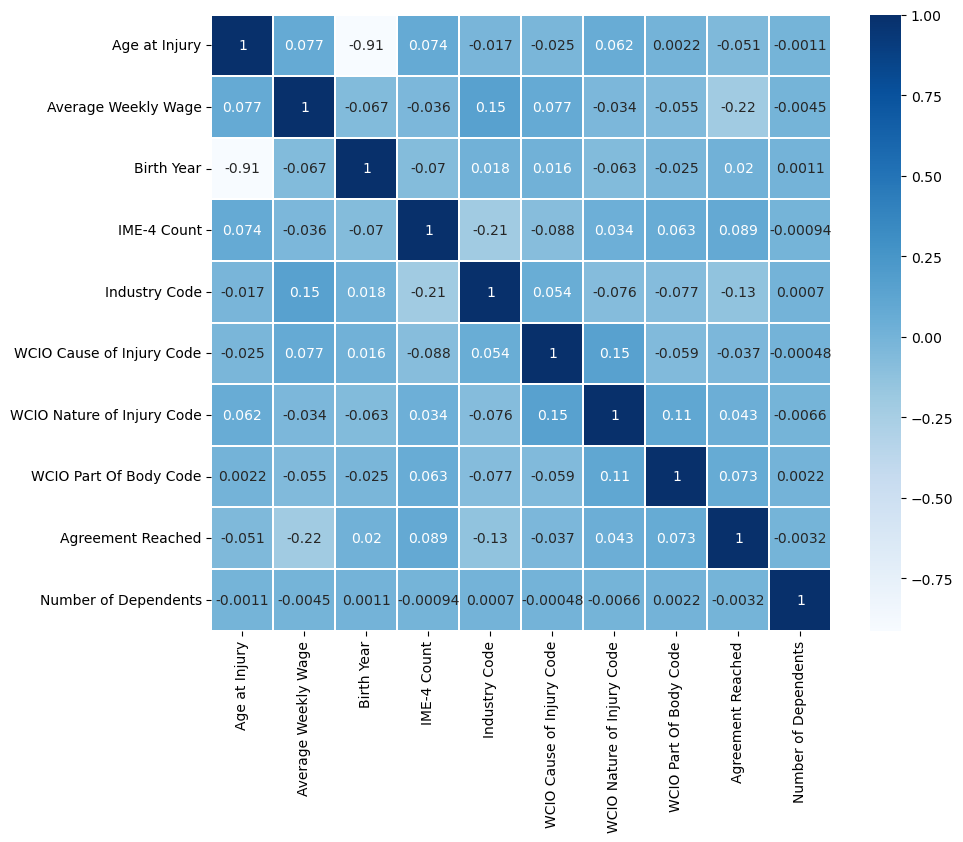

In [8]:
# Drop column that is always missing
temp = df.drop('OIICS Nature of Injury Description', axis=1)

# Remove rows with missing values
temp = temp.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [9]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 20
    if df[column].nunique() < 20:
        
        # Print unique values and count for columns with fewer than 20 unique values
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
Number of unique values: 3

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
Number of unique values: 2

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Number of unique values: 8

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Number of unique values: 8

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
Number of unique values: 2

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
Number of unique values: 8

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
Number of unique values: 4

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK'

## 2.1 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [10]:
# Filter the DataFrame for rows where 'Age at Injury' is less than 18
df[df['Age at Injury'] < 18]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
5394788,2019-12-23,16.0,N,2020-01-02,N,0.0,2003.0,2020-01-02,NaN,PENNSYLVANIA MANUFACTURERS',1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,32.0,ON ICE OR SNOW,40.0,LACERATION,14.0,EYE(S),11776,0.0,Not Work Related,4.0
5394093,2019-12-28,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5.0
5394068,NaN,0.0,N,2020-01-02,Y,0.0,1959.0,NaN,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0
5393794,NaN,0.0,N,2020-01-02,Y,0.0,1984.0,NaN,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164933,NaN,0.0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6.0
6164795,2022-08-20,17.0,N,2022-12-30,N,0.0,2005.0,2022-12-30,NaN,SEQUOIA INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,SCHOHARIE,N,BINGHAMTON,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,12149,0.0,Not Work Related,5.0
6164931,NaN,0.0,N,2022-12-30,Y,0.0,1957.0,NaN,2022-12-27,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1. CANCELLED,KINGS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0.0


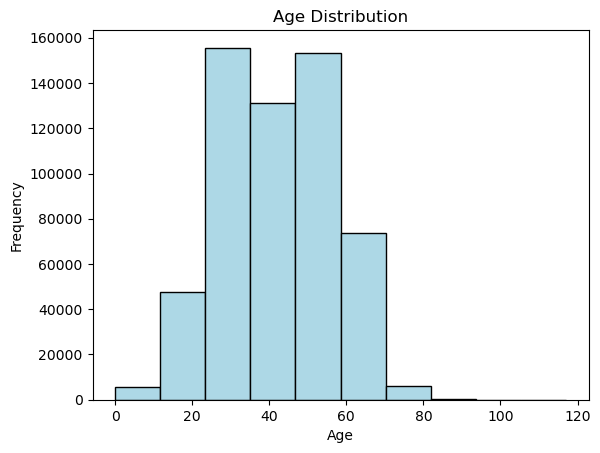

In [11]:
# Plot histogram for the 'Age at Injury' column
v.plot_histogram(df['Age at Injury'], 
                 'Age',         # x-axis label
                 'Frequency',   # y-axis label
                 'Age Distribution')  # Title of the plot

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Delete Ages
</div>


In [12]:
# Filter the DataFrame to include rows where 'Age at Injury' is between 18 and 80, or where 'Age at Injury' is missing (NaN)
df = df.loc[
    (df['Age at Injury'] >= 18) & (df['Age at Injury'] <= 80)  # Age between 18 and 80
    | (df['Age at Injury'].isna())  # Include rows where 'Age at Injury' is missing
]
# 7k rows < 18 & 700 rows > 80

**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [13]:
# Filter the DataFrame for rows where 'Birth Year' is earlier than 1800
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


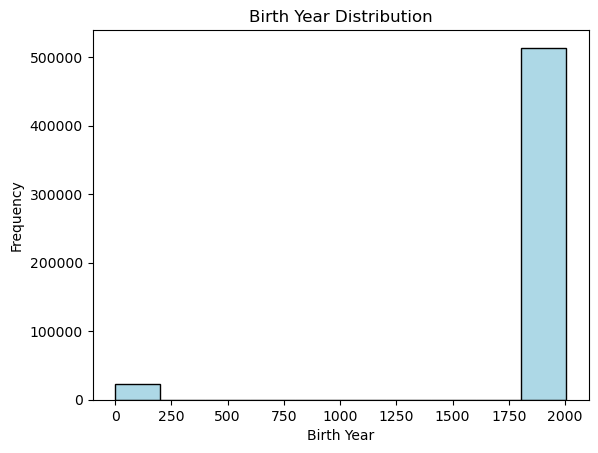

In [14]:
# Plot histogram for the 'Birth Year' column
v.plot_histogram(df['Birth Year'], 
                 'Birth Year',     # x-axis label
                 'Frequency',      # y-axis label
                 'Birth Year Distribution')  # Title of the plot

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Low Birth Year
</div>


In [15]:
#df = df.loc[(df['Birth Year'] > 0) | (df['Birth Year'].isna())]

**IME-4 Count**

Very High 

In [16]:
# Filter the DataFrame for rows where 'IME-4 Count' is greater than 30
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


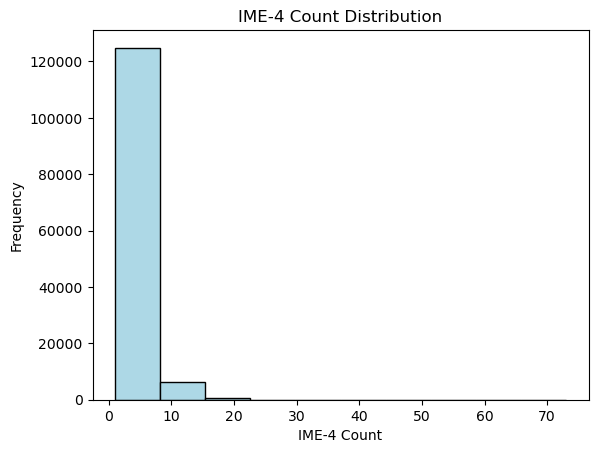

In [17]:
# Plot histogram for the 'IME-4 Count' column
v.plot_histogram(df['IME-4 Count'], 
                 'IME-4 Count',     # x-axis label
                 'Frequency',       # y-axis label
                 'IME-4 Count Distribution')  # Title of the plot

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Delete IME-4 Count > 30
</div>


In [18]:
# Filter the DataFrame to include rows where 'IME-4 Count' is less than or equal to 30, or where 'IME-4 Count' is missing (NaN)
df = df.loc[
    (df['IME-4 Count'] <= 30)  # IME-4 Count less than or equal to 30
    | (df['IME-4 Count'].isna())  # Include rows where 'IME-4 Count' is missing
]

**OIICS Nature of Injury Description**

always missing

In [19]:
# Print the number of missing values in 'OIICS Nature of Injury Description'
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")

# Print the total number of rows in the DataFrame
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 585073
Number of Rows in the Dataset: 585073


**Zip Code**

In [20]:
# Filter the DataFrame for rows where 'Zip Code' is not missing (NaN) and where 'Zip Code' is not numeric
df[
    df['Zip Code'].notna()  # 'Zip Code' is not missing
    & df['Zip Code'].apply(lambda x: not str(x).isnumeric())  # 'Zip Code' is not numeric
]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5399802,2019-12-21,25.0,N,2020-01-09,N,1631.50,0.0,2020-01-09,NaN,STATE INSURANCE FUND,2A. SIF,3. MED ONLY,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,L1N 5,0.0,Not Work Related,0.0
5404203,2020-01-11,29.0,N,2020-01-16,Y,1401.17,0.0,2020-03-11,2021-07-01,ACE AMERICAN INSURANCE CO.,1A. PRIVATE,5. PPD SCH LOSS,HERKIMER,N,BUFFALO,2020-10-27,M,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,T1B0P,0.0,Not Work Related,5.0
5407348,2019-12-28,23.0,N,2020-01-17,N,0.00,0.0,2020-01-17,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",7.0,CONCUSSION,18.0,SOFT TISSUE,L6Y 1,0.0,Not Work Related,2.0
5412514,2019-11-26,51.0,N,2020-01-24,N,0.00,0.0,2020-01-24,NaN,STATE INSURANCE FUND,2A. SIF,3. MED ONLY,WAYNE,N,ROCHESTER,NaN,M,NaN,31.0,MANUFACTURING,UK,NaN,10.0,MACHINE OR MACHINERY,13.0,CRUSHING,52.0,UPPER LEG,JMDMR,0.0,Not Work Related,4.0
5413081,2020-01-21,27.0,N,2020-01-27,N,0.00,0.0,2020-01-27,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,54.0,LOWER LEG,N2P 1,0.0,Not Work Related,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143240,2022-11-07,23.0,N,2022-11-29,N,0.00,0.0,2022-11-29,NaN,ARCH INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,NEW YORK,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,V1M2B,0.0,Not Work Related,2.0
6147711,2022-11-02,29.0,N,2022-12-06,N,0.00,0.0,2022-12-06,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,BROOME,N,BINGHAMTON,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",43.0,PUNCTURE,36.0,FINGER(S),L2P0A,0.0,Not Work Related,3.0
6150118,2022-01-29,25.0,N,2022-12-09,Y,1748.25,0.0,2022-12-20,2022-12-06,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,ALBANY,N,BUFFALO,2024-01-31,M,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,L6L 1,0.0,Not Work Related,0.0


**Agreement Reached**

w/ a lot of zeros

In [21]:
# Count the occurrences of each unique value in the 'Agreement Reached' column
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    539308
1.0     26320
Name: count, dtype: int64

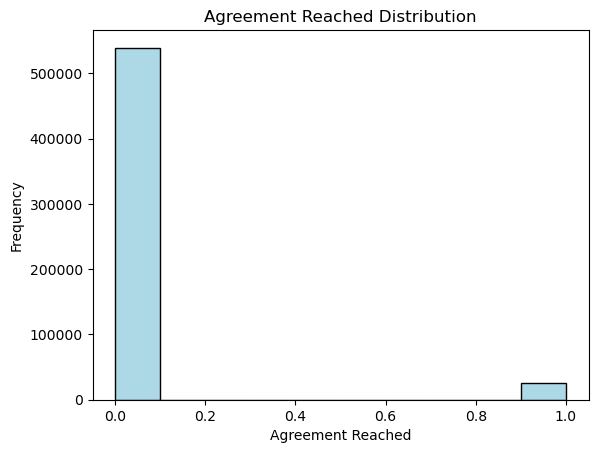

In [22]:
# Plot histogram for the 'Agreement Reached' column
v.plot_histogram(df['Agreement Reached'], 
                 'Agreement Reached',   # x-axis label
                 'Frequency',            # y-axis label
                 'Agreement Reached Distribution')  # Title of the plot

**WCB Decision**

always the same

In [23]:
# Get the unique values in the 'WCB Decision' column
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [24]:
# Count the occurrences of each unique value in the 'Claim Injury Type' column
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        286480
4. TEMPORARY       147444
3. MED ONLY         68070
5. PPD SCH LOSS     48189
1. CANCELLED        10699
6. PPD NSL           4197
8. DEATH              452
7. PTD                 97
Name: count, dtype: int64

**Incoherent Columns**

Some columns exist in train data but not on test

In [25]:
# Identify columns present in the training dataset but not in the test dataset
train_columns = set(df.columns)
test_columns = set(test.columns)

# Compute the difference between the columns of the train and test datasets
not_in_train = train_columns - test_columns

# Display the columns that are present in the training dataset but missing in the test dataset
print(f'Columns in train but not in test: {not_in_train}')

Columns in train but not in test: {'Agreement Reached', 'WCB Decision', 'Claim Injury Type'}


# 3. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

In [26]:
# Display the first 5 rows of the DataFrame
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


## 3.1 Duplicates

<a href="#top">Top &#129033;</a>

In [27]:
# Identify and return rows that are duplicates in the DataFrame
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Identify all duplicated rows in the DataFrame (keep=False marks all duplicates as True)
duplicates = df.duplicated(keep=False)

# Identify rows where at least one column (excluding 'Assembly Date') has non-missing values
non_missing_in_other_columns = df.drop(columns=['Assembly Date']).notna().any(axis=1)

# Filter the DataFrame to return rows that are duplicated and have non-missing values in other columns
df[duplicates & non_missing_in_other_columns]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [29]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [30]:
# Filter and return rows that are duplicates in the DataFrame so we can verify the success of the previous steps
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 3.2 Feature Engineering

<a href="#top">Top &#129033;</a>

<a class="anchor" id="section3.2"></a>

<a href="#section5.1">Go to Section 5.1 &#8595;</a>

**Claim Injury Type**

Address missing values in target variable changing data types and encoding

In [31]:
# Filter and display rows where the 'Claim Injury Type' column has missing values
df[df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaN,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaN,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaN,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaN,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping them

In [32]:
# Remove rows with missing values in the 'Claim Injury Type' column
df.dropna(subset=['Claim Injury Type'], inplace=True)

After dropping the missing values we can encode

In [33]:
# Map descriptive labels in 'Claim Injury Type' to numeric codes for consistency and modeling
label_mapping = {
    "1. CANCELLED": 1,
    "2. NON-COMP": 2,
    "3. MED ONLY": 3,
    "4. TEMPORARY": 4,
    "5. PPD SCH LOSS": 5,
    "6. PPD NSL": 6,
    "7. PTD": 7,
    "8. DEATH": 8
}

df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

### 3.2.1 Data Type Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [34]:
#df.info()

In [35]:
# Convert date columns to datetime format for accurate date operations, sorting, and calculations.
df['Accident Date'] = pd.to_datetime(df['Accident Date'], 
                                     errors='coerce')

df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], 
                                     errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], 
                                errors='coerce')

df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], 
                                errors='coerce')

df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], 
                                          errors='coerce')

### 3.2.2 Encoding

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

2 encodings -> decide what's best in feature selection

In [36]:
# Calculate the frequency of each unique value in the 'Alternative Dispute Resolution' column
freq = df['Alternative Dispute Resolution'].value_counts()

# Display the frequency distribution
freq

Alternative Dispute Resolution
N    563038
Y      2585
U         5
Name: count, dtype: int64

In [37]:
# Map frequency counts of 'Alternative Dispute Resolution' to a new feature
df['Alternative Dispute Resolution Freq'] = df['Alternative Dispute Resolution'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [38]:
# Initialize an ordinal encoder for 'N', 'Y', and 'U' categories
encoder = OrdinalEncoder(categories=[['N', 'Y', 'U']])

In [39]:
# Apply label encoding to the 'Alternative Dispute Resolution' column to convert categorical values into numeric format
df['Alternative Dispute Resolution'] = encoder.fit_transform(df[['Alternative Dispute Resolution']])

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [40]:
# Count the occurrences of each unique value in the 'Attorney/Representative' column
df['Attorney/Representative'].value_counts()

Attorney/Representative
N    387719
Y    177909
Name: count, dtype: int64

In [41]:
# Replace 'N' with 0 and 'Y' with 1 in the 'Attorney/Representative' column for binary encoding
df['Attorney/Representative'] = df['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

In [42]:
# Get the number of unique values in the 'Carrier Name' column
df['Carrier Name'].nunique()

2031

frequency encoder

In [43]:
# Count the frequency of each unique value in the 'Carrier Name' column
freq = df['Carrier Name'].value_counts()

In [44]:
# Map the frequency of each 'Carrier Name' to replace values with their respective counts
df['Carrier Name'] = df['Carrier Name'].map(freq)

**Carrier Type**

2 encodings -> decide what's best in feature selection

In [45]:
# Count the frequency of each unique value in the 'Carrier Type' column
freq = df['Carrier Type'].value_counts()

# Display the frequency counts
freq

Carrier Type
1A. PRIVATE                                    280879
3A. SELF PUBLIC                                120156
2A. SIF                                        109871
4A. SELF PRIVATE                                52139
UNKNOWN                                          1615
5D. SPECIAL FUND - UNKNOWN                        962
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         3
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          3
Name: count, dtype: int64

In [46]:
# Map the frequency of each 'Carrier Type' to replace values with their respective counts
df['Carrier Type'] = df['Carrier Type'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [47]:
# Mapping variations of 'Special Fund' values to a single unified category
mapping = {
    '5D. SPECIAL FUND - UNKNOWN': '5. SPECIAL FUND',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5. SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5. SPECIAL FUND'
}

In [48]:
# Apply the mapping to standardize 'Carrier Type' values
df['Carrier Type'] = df['Carrier Type'].replace(mapping)

In [49]:
# Convert the 'Carrier Type' column into one-hot encoded dummy variables
df = pd.get_dummies(df, columns=['Carrier Type'])

# Drop the last dummy variable to prevent multicollinearity (redundancy)
df = df.iloc[:, :-1]

In [50]:
# Select columns related to 'Carrier Type' based on their column names
dummy_columns = df.filter(like='Carrier Type').columns

# Convert all the 'Carrier Type' dummy columns to integers (0 or 1)
df[dummy_columns] = df[dummy_columns].astype(int)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [51]:
# Count the number of unique values in the 'County of Injury' column
df['County of Injury'].nunique()

63

In [52]:
# Count the frequency of each unique value in the 'County of Injury' column
freq = df['County of Injury'].value_counts()

In [53]:
# Map the frequency of each 'County of Injury' to replace values with their respective counts
df['County of Injury'] = df['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [54]:
# Count the frequency of 'N' and 'Y' values in the 'COVID-19 Indicator' column
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    538228
Y     27400
Name: count, dtype: int64

In [55]:
# Replace the 'N' (No) values with 0 and 'Y' (Yes) values with 1 in the 'COVID-19 Indicator' column
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

2 encodings -> decide what's best in feature selection

In [56]:
# Count the frequency of each unique value in the 'District Name' column to understand its distribution
freq = df['District Name'].value_counts()
freq  # Display the frequency counts for each district

District Name
NYC           267030
ALBANY         84987
HAUPPAUGE      59567
BUFFALO        44770
SYRACUSE       44022
ROCHESTER      39855
BINGHAMTON     21566
STATEWIDE       3831
Name: count, dtype: int64

In [57]:
# Replace each district name in the 'District Name' column with its corresponding frequency count
df['District Name'] = df['District Name'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [58]:
# Generate dummy variables for the 'District Name' column
df = pd.get_dummies(df, columns=['District Name'])

# Drop the last column to avoid redundancy (since it is a result of one-hot encoding)
df = df.iloc[:, :-1]

In [59]:
# Identify columns related to 'District Name' generated by one-hot encoding
dummy_columns = df.filter(like='District Name').columns

# Convert the dummy variables to integer type (0 or 1)
df[dummy_columns] = df[dummy_columns].astype(int)

**Gender**

2 encodings -> decide what's best in feature selection

In [60]:
# Count the occurrences of each gender in the 'Gender' column
df['Gender'].value_counts()

Gender
M    329958
F    231010
U      4615
X        45
Name: count, dtype: int64

In [61]:
# Map gender values to numerical codes: 0 for Male, 1 for Female, 2 for Unknown/Other
df['Gender Enc'] = df['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [62]:
# Encoding on the 'Gender' column, creating dummy variables
df = pd.get_dummies(df, columns=['Gender'])

# Drop the last column to avoid redundancy, as one column is sufficient for binary encoding
df = df.iloc[:, :-1]

In [63]:
# Get the names of the newly created dummy columns related to 'Gender'
dummy_columns = df.filter(like='Gender').columns

# Convert the dummy columns to integer type (0 or 1) for model compatibility
df[dummy_columns] = df[dummy_columns].astype(int)

**Medical Fee Region**

encode

In [64]:
# Calculate the frequency of each unique value in the 'Medical Fee Region' column
freq = df['Medical Fee Region'].value_counts()
freq # Display the frequency counts

Medical Fee Region
IV     262344
I      133794
II      83865
III     52834
UK      32791
Name: count, dtype: int64

In [65]:
# Replace each 'Medical Fee Region' value with its corresponding frequency count
df['Medical Fee Region'] = df['Medical Fee Region'].map(freq)

### 3.2.3 Other Transformations

<a href="#top">Top &#129033;</a>

**Accident Date**

transform into year (maybe month and day too)

In [66]:
# Extract the year, month, and day from the 'Accident Date' column and assign them to new columns
df['Accident Year'] = df['Accident Date'].dt.year
df['Accident Month'] = df['Accident Date'].dt.month
df['Accident Day'] = df['Accident Date'].dt.day

**Assembly Date**

transform into year (maybe month and day too)

In [67]:
# Extract the year, month, and day from the 'Assembly Date' column and assign them to new columns
df['Assembly Year'] = df['Assembly Date'].dt.year
df['Assembly Month'] = df['Assembly Date'].dt.month
df['Assembly Day'] = df['Assembly Date'].dt.day

**C-2 Date**

transform into year (maybe month and day too)

In [68]:
# Extract the year, month, and day from the 'C-2 Date' column and assign them to new columns
df['C-2 Year'] = df['C-2 Date'].dt.year
df['C-2 Month'] = df['C-2 Date'].dt.month
df['C-2 Day'] = df['C-2 Date'].dt.day

**Zip Code**

transform non-numeric into missing values and add a binary column that is 1 if string, 0 if numeric and -1 to NaN

In [69]:
# Create a new column 'Zip Code Valid' to flag the validity of the 'Zip Code' field
df['Zip Code Valid'] = df['Zip Code'].apply(
    lambda x: -1 if pd.isna(x)          # Assign -1 for missing values (NaN)
    else (1 if not str(x).isnumeric()    # Assign 1 for non-numeric values
          else 0)                        # Assign 0 for valid numeric Zip Codes
)

In [70]:
# Create a new column 'Zip Code Numbers' to retain numeric zip codes and set non-numeric values as NaN
df['Zip Code Numbers'] = df['Zip Code'].apply(
    lambda x: np.nan                    # Assign NaN for non-numeric values
    if not str(x).isnumeric()            # Check if the value is not numeric
    else x                               # Keep the original value if it's numeric
)

**Columns not in test data**

In [71]:
df = df.drop(['Agreement Reached', 'WCB Decision'], axis = 1)

**Drop Transformed Columns**

In [72]:
# Drop the transformed date-related columns: 'Accident Date', 'Assembly Date', and 'C-2 Date' from the dataframe
df = df.drop(['Accident Date', 'Assembly Date', 'C-2 Date', 'Zip Code'], axis = 1)

### 3.2.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [73]:
# Create a new dataframe with unique combinations of 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description'
injury_cause = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

# Set 'WCIO Cause of Injury Code' as the index for the new dataframe
injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

# Display the first 2 rows of the resulting dataframe
injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
97.0,REPETITIVE MOTION


In [74]:
# Create a new dataframe with unique combinations of 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description'
injury_nature = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

# Set 'WCIO Nature of Injury Code' as the index for the new dataframe
injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

# Display the first 2 rows of the resulting dataframe
injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [75]:
# Create a new dataframe with unique combinations of 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description'
body_code = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

# Set 'WCIO Part Of Body Code' as the index for the new dataframe
body_code_df = body_code.set_index('WCIO Part Of Body Code')

# Display the first 2 rows of the resulting dataframe
body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
62.0,BUTTOCKS
38.0,SHOULDER(S)


In [76]:
# Create a new dataframe with unique combinations of 'Industry Code' and 'Industry Code Description'
industry_code = df[['Industry Code', 'Industry Code Description']].drop_duplicates()

# Set 'Industry Code' as the index for the new dataframe
industry_code_df = industry_code.set_index('Industry Code')

# Display the first 2 rows of the resulting dataframe
industry_code_df.head(2)

,Industry Code Description
Industry Code,
44.0,RETAIL TRADE
23.0,CONSTRUCTION


In [77]:
# Drop unnecessary columns from the DataFrame
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

## 3.3 Train-Test Split

<a href="#top">Top &#129033;</a>

**Holdout Method**

In [78]:
X, y = df.drop('Claim Injury Type', axis=1), df['Claim Injury Type'] 

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)


## 3.4 Missing Values

<a href="#top">Top &#129033;</a>

In [80]:
X_train.isna().sum()

Age at Injury                               0
Alternative Dispute Resolution              0
Attorney/Representative                     0
Average Weekly Wage                     22522
Birth Year                              22989
C-3 Date                               306329
Carrier Name                                0
County of Injury                            0
COVID-19 Indicator                          0
First Hearing Date                     333959
IME-4 Count                            346929
Industry Code                            6720
Medical Fee Region                          0
OIICS Nature of Injury Description     452502
WCIO Cause of Injury Code               10402
WCIO Nature of Injury Code              10417
WCIO Part Of Body Code                  11203
Number of Dependents                        0
Alternative Dispute Resolution Freq         0
Carrier Type_3                              0
Carrier Type_962                            0
Carrier Type_1615                 

**Accident Year, Month, Day**

need to fill before birth year otherwise error

In [81]:
accident_med = {
    'Accident Year': X_train['Accident Year'].median(),
    'Accident Month': X_train['Accident Month'].median(),
    'Accident Day': X_train['Accident Day'].median()
}

In [82]:
X_train['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)
X_train['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)
X_train['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)

In [83]:
X_val['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)
X_val['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)
X_val['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)

**Birth Year**

In [84]:
# Mask for X_train where 'Birth Year' is missing or 0 and other columns are not missing
train_mask = X_train['Accident Year'].notna() & X_train['Age at Injury'].notna() & \
           (X_train['Birth Year'].isna() | (X_train['Birth Year'] == 0))

# Apply the imputation to X_val based on 'Accident Year' and 'Age at Injury'
X_train.loc[train_mask, 'Birth Year'] = X_train['Accident Year'] - X_train['Age at Injury']


In [85]:
val_mask = X_val['Accident Year'].notna() & X_val['Age at Injury'].notna() & \
           (X_val['Birth Year'].isna() | (X_val['Birth Year'] == 0))

X_val.loc[val_mask, 'Birth Year'] = X_val['Accident Year'] - X_val['Age at Injury']

**C-3 Date**

In [86]:
print(f'There are {len(X_train[X_train["C-3 Date"].isna()])} rows with missing values')
#X_train[X_train['C-3 Date'].isna()].head(2)

There are 306329 rows with missing values


In [87]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
X_train['C-3 Date Binary'] = X_train['C-3 Date'].notna().astype(int)

In [88]:
X_val['C-3 Date Binary'] = X_val['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [89]:
print(f'There are {len(X_train[X_train["First Hearing Date"].isna()])} rows with missing values')
#X_train[X_train['First Hearing Date'].isna()].head(2)

There are 333959 rows with missing values


In [90]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year
X_train['First Hearing Year'] = X_train['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

In [91]:
X_val['First Hearing Year'] = X_val['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [92]:
print(f'There are {len(X_train[X_train["IME-4 Count"].isna()])} rows with missing values')
#X_train[X_train['IME-4 Count'].isna()].head(2)

There are 346929 rows with missing values


In [93]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

In [94]:
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [95]:
print(f'There are {len(X_train[X_train["OIICS Nature of Injury Description"].isna()])} rows with missing values')
#X_train[X_train['OIICS Nature of Injury Description'].isna()].head(2)

There are 452502 rows with missing values


In [96]:
# size of missing / size of dataset
len(X_train[X_train['OIICS Nature of Injury Description'].isna()]) / len(X_train)

1.0

Drop replaced and not needed variables

In [97]:
X_train = X_train.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

In [98]:
X_val = X_val.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

**Code Variables** 

(Except zip code)

In [99]:
columns_to_fill = ['WCIO Cause of Injury Code', 
                   'WCIO Nature of Injury Code', 
                   'WCIO Part Of Body Code', 
                   'Industry Code']

In [100]:
X_train[columns_to_fill] = X_train[columns_to_fill].fillna(0)

In [101]:
X_val[columns_to_fill] = X_val[columns_to_fill].fillna(0)

**Zip Code**

In [102]:
X_train['Zip Code Numbers'] = X_train['Zip Code Numbers'].fillna(99999)

In [103]:
X_val['Zip Code Numbers'] = X_val['Zip Code Numbers'].fillna(99999)

**C-2 Year, Month, Day**

In [104]:
c2_med = {
    'C-2 Year': X_train['C-2 Year'].median(),
    'C-2 Month': X_train['C-2 Month'].median(),
    'C-2 Day': X_train['C-2 Day'].median()
}

In [105]:
X_train['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
X_train['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
X_train['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

In [106]:
X_val['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
X_val['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
X_val['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

**Average Weekly Wage**

In [107]:
X_train['Average Weekly Wage'] = p.ball_tree_impute(X_train, 'Average Weekly Wage', n_neighbors=5)

In [108]:
X_val['Average Weekly Wage'] = p.ball_tree_impute(X_val, 'Average Weekly Wage', n_neighbors=5)

**Verify the success**

In [109]:
print('X_train \n')
print(X_train.isna().sum())
print('\nX_val \n')
print(X_val.isna().sum())

X_train 

Age at Injury                          0
Alternative Dispute Resolution         0
Attorney/Representative                0
Average Weekly Wage                    0
Birth Year                             0
Carrier Name                           0
County of Injury                       0
COVID-19 Indicator                     0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Number of Dependents                   0
Alternative Dispute Resolution Freq    0
Carrier Type_3                         0
Carrier Type_962                       0
Carrier Type_1615                      0
Carrier Type_52139                     0
Carrier Type_109871                    0
Carrier Type_120156                    0
District Name_3831                     0
District Name_21566                    0
Distri

## 3.5 Outliers

<a href="#top">Top &#129033;</a>

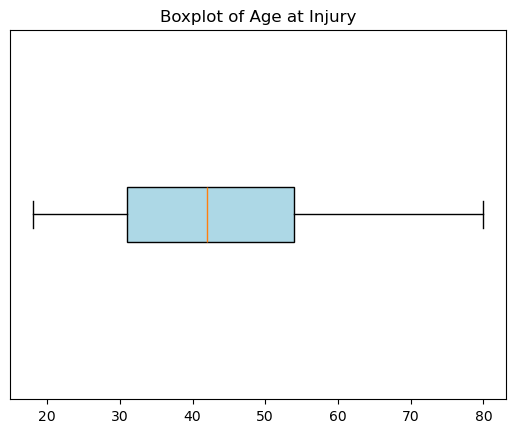

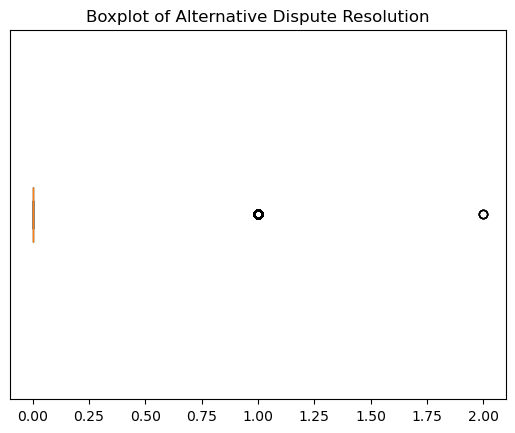

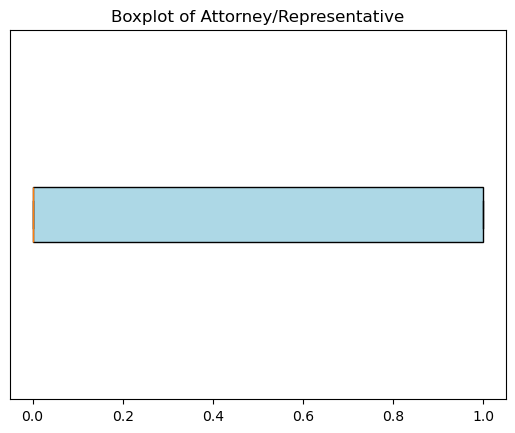

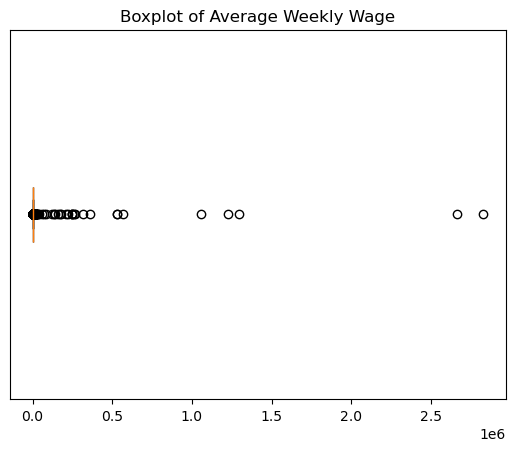

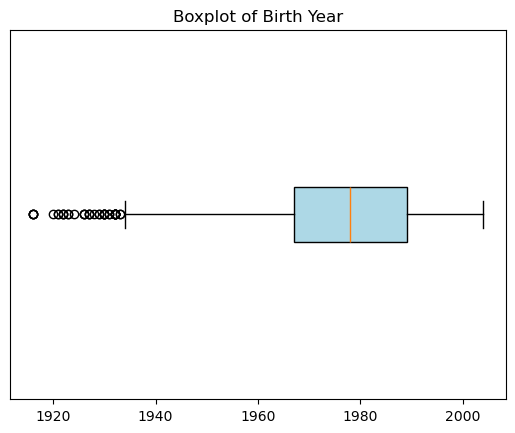

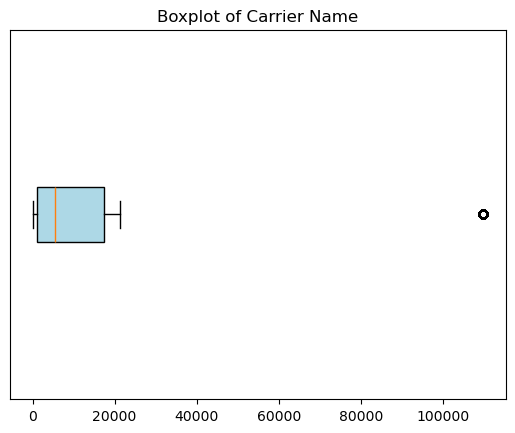

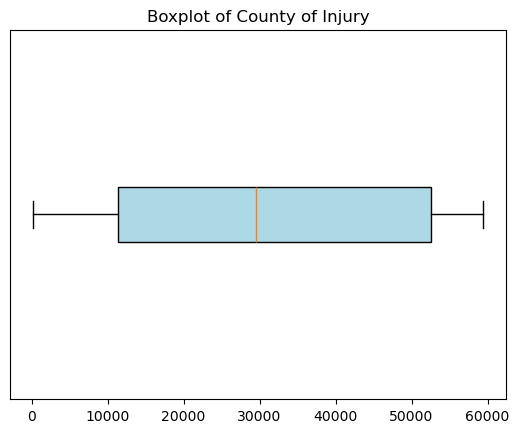

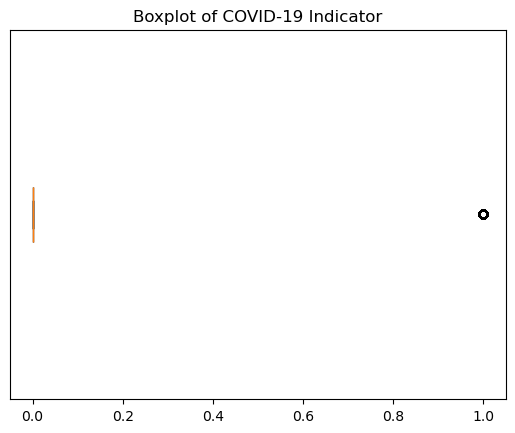

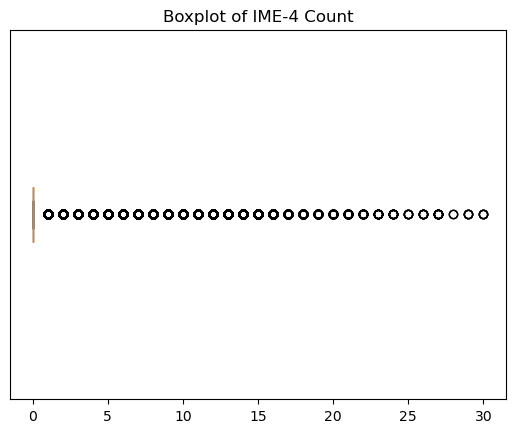

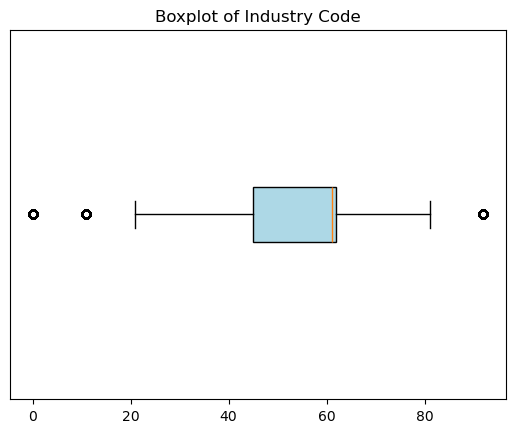

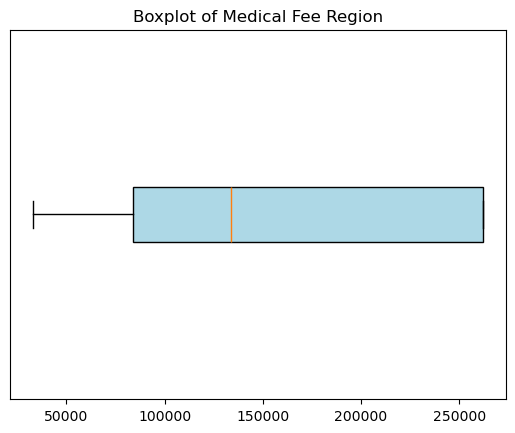

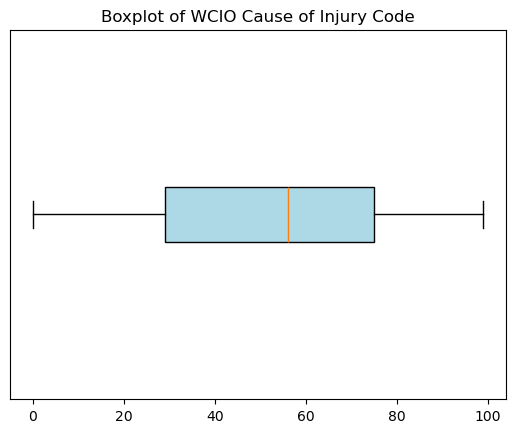

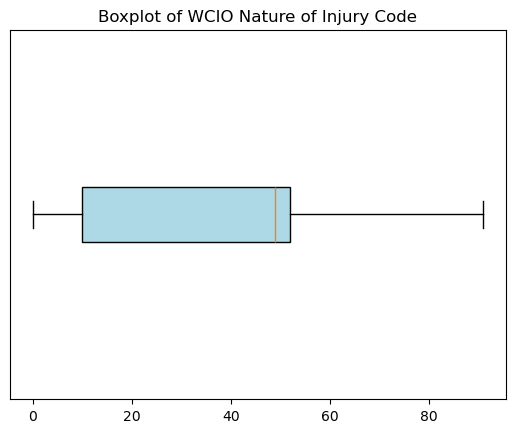

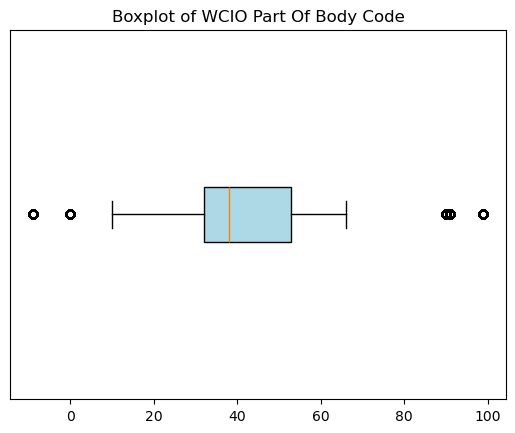

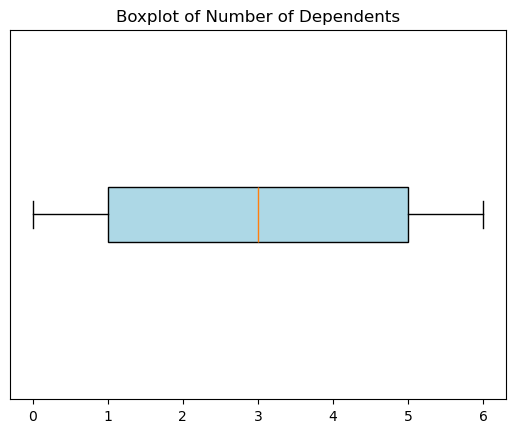

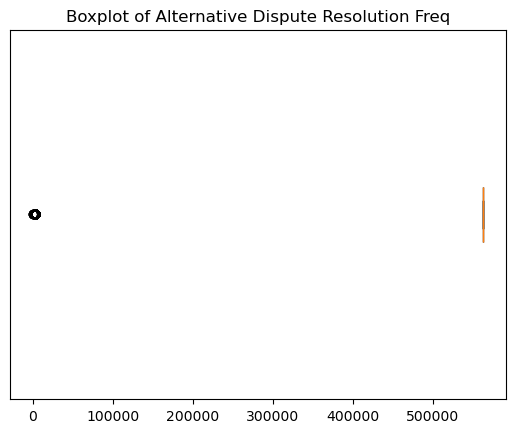

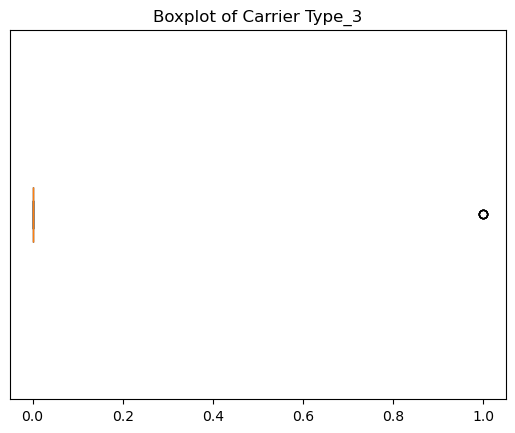

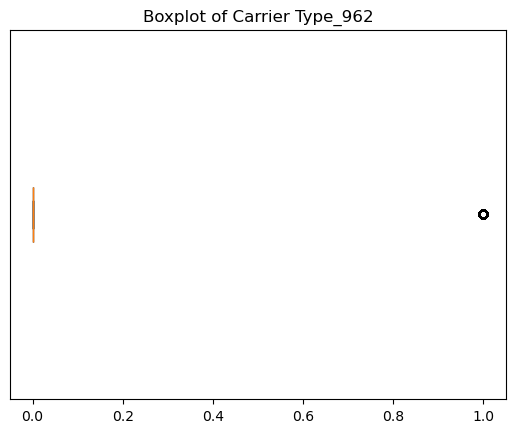

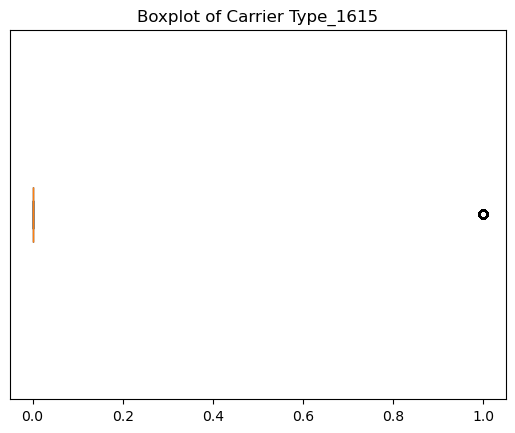

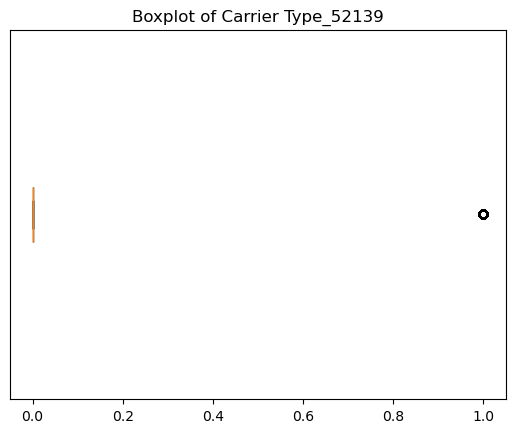

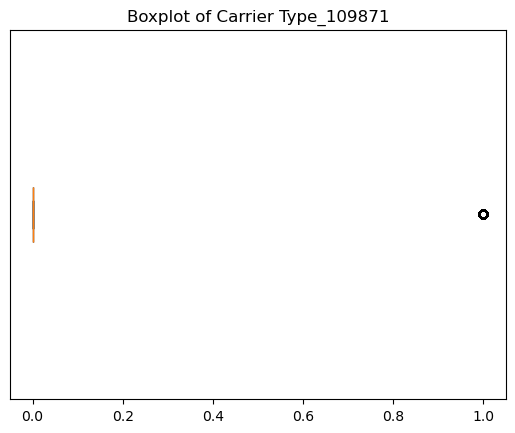

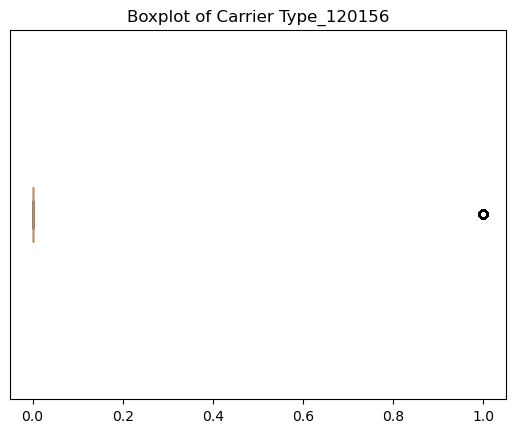

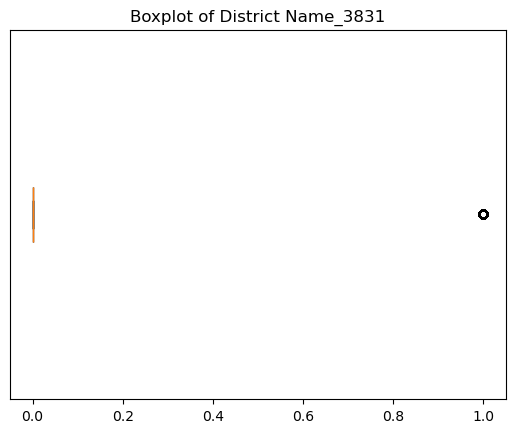

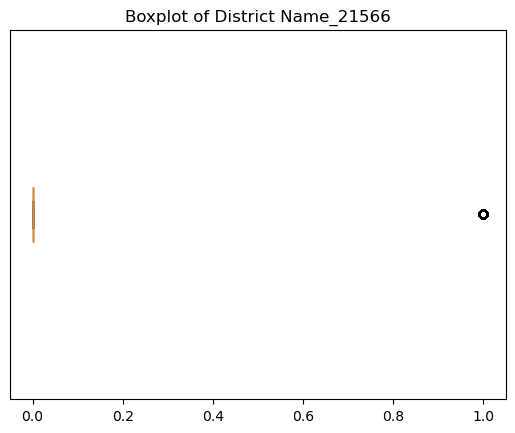

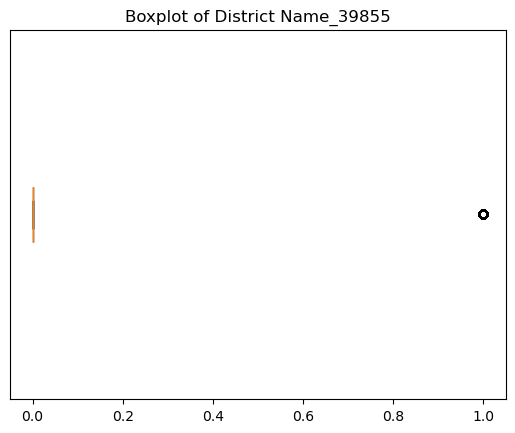

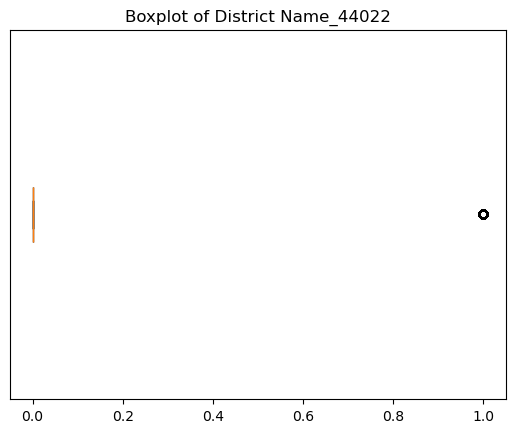

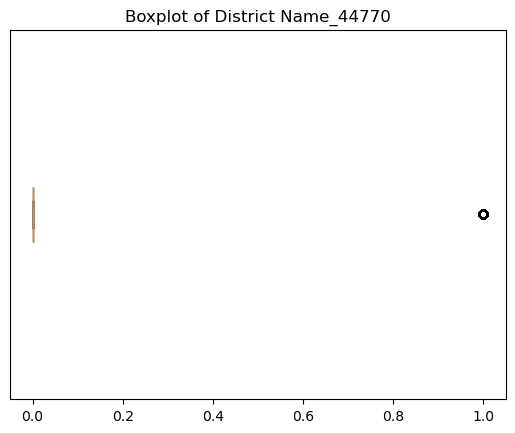

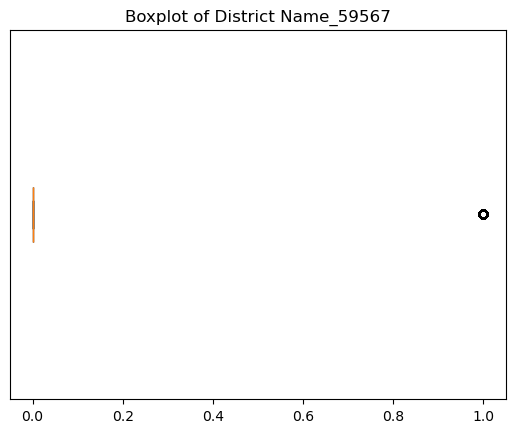

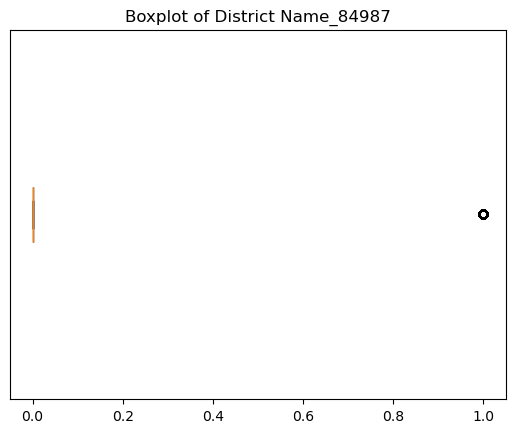

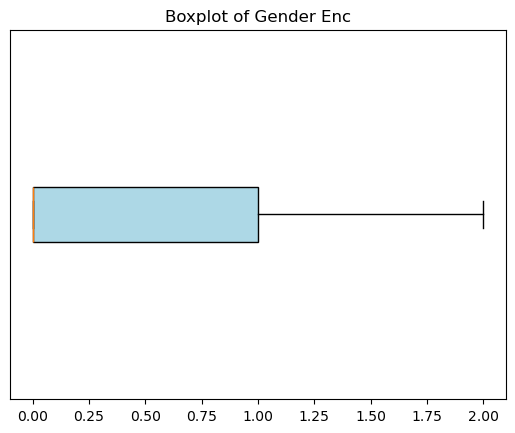

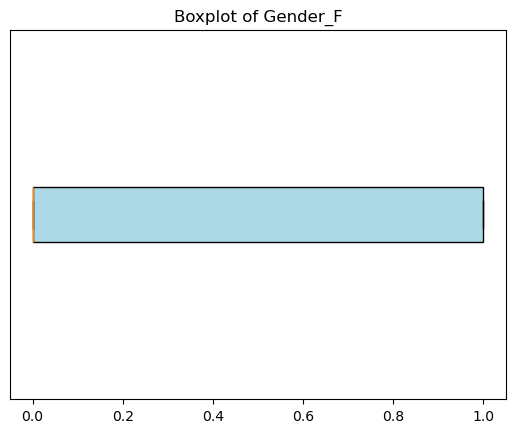

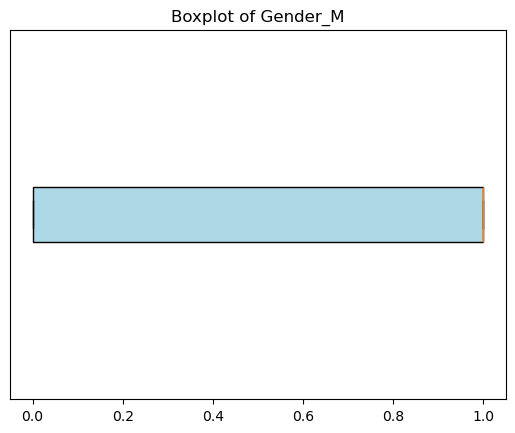

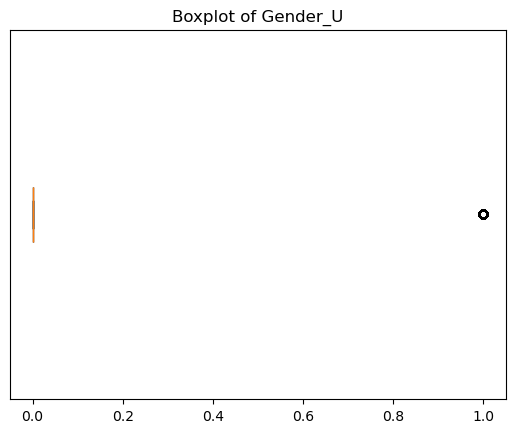

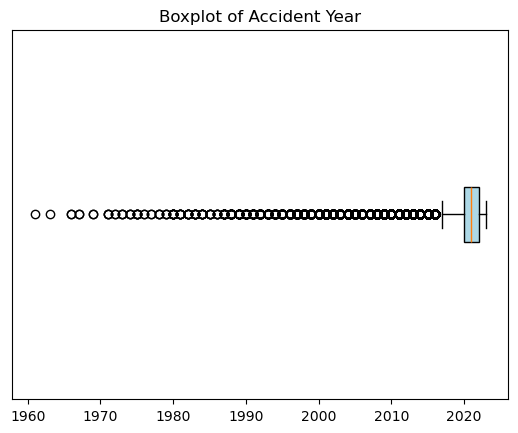

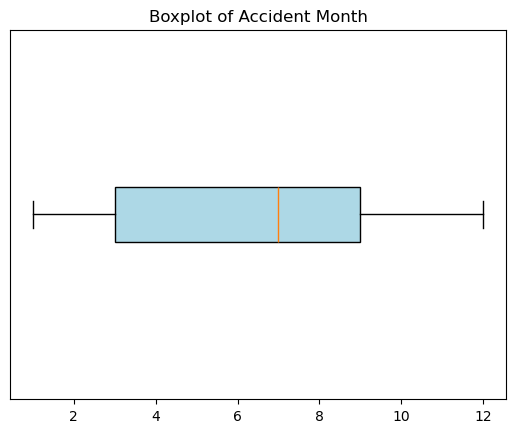

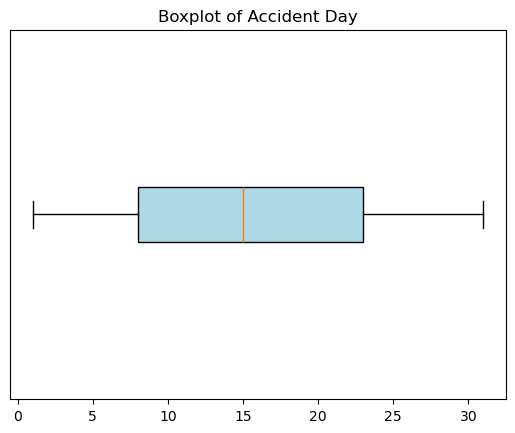

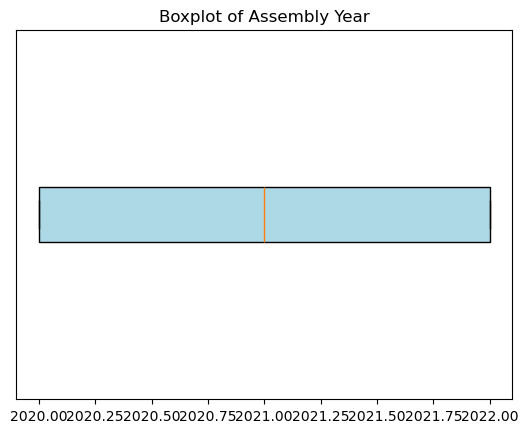

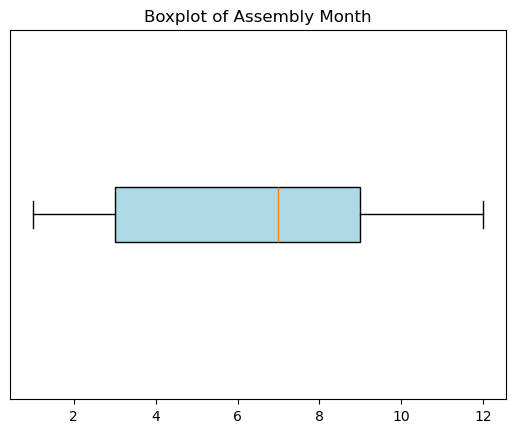

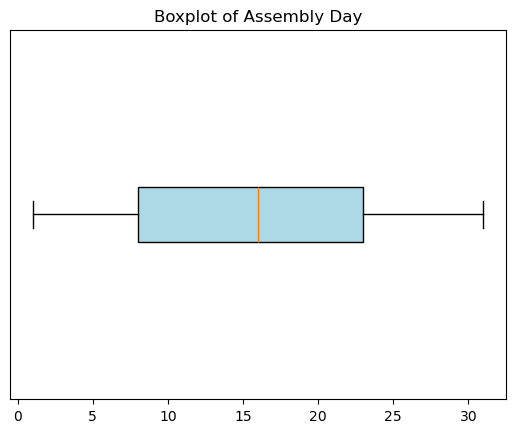

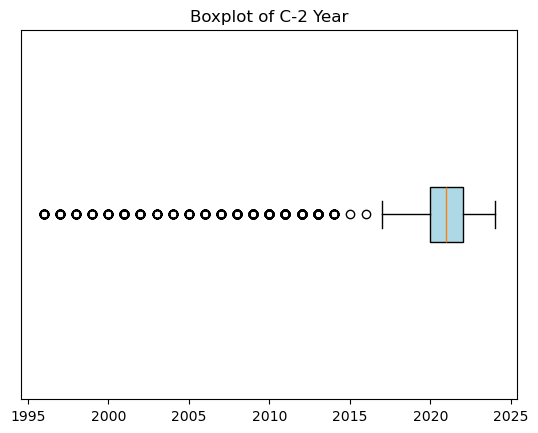

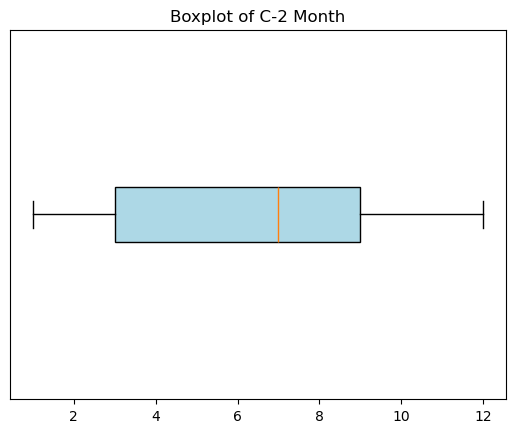

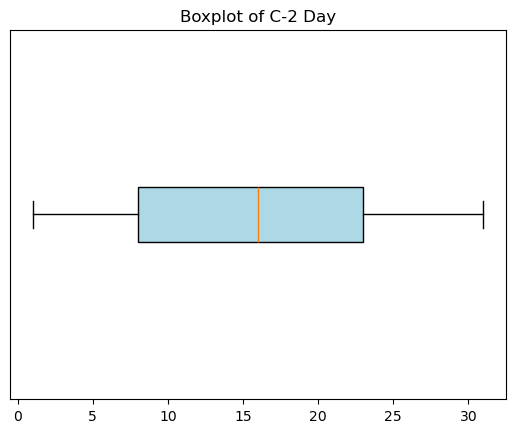

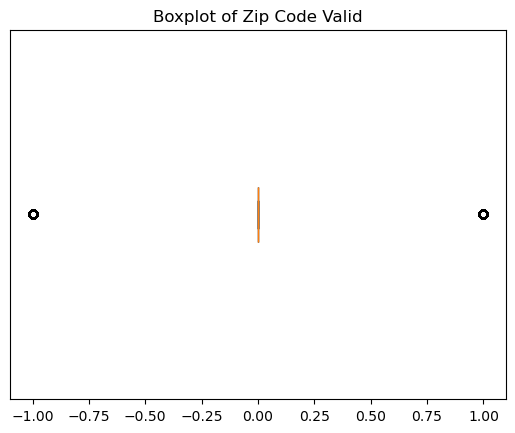

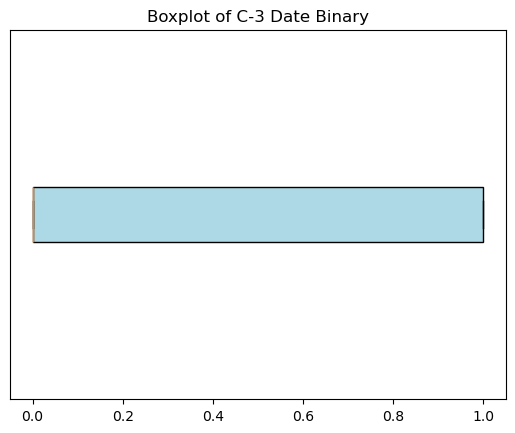

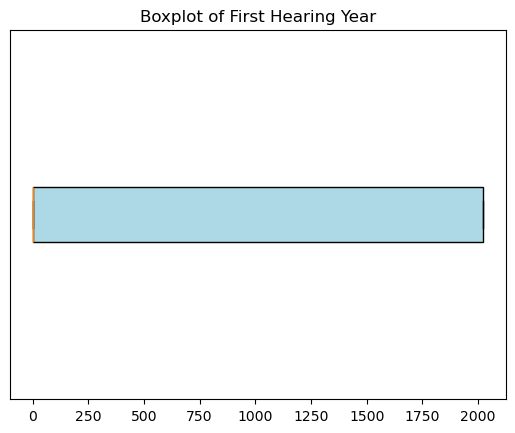

In [110]:
v.boxplots(X_train.loc[:, X_train.columns])

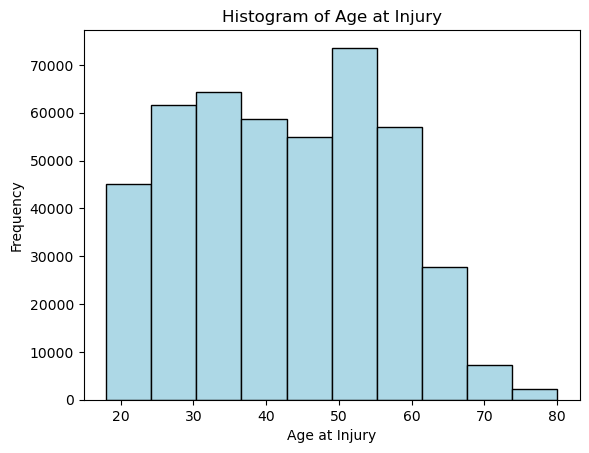

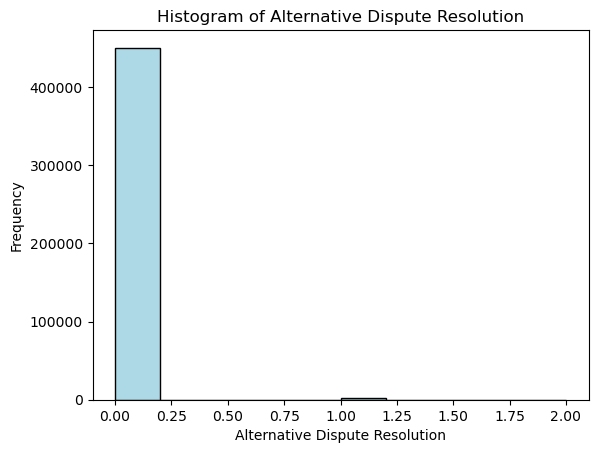

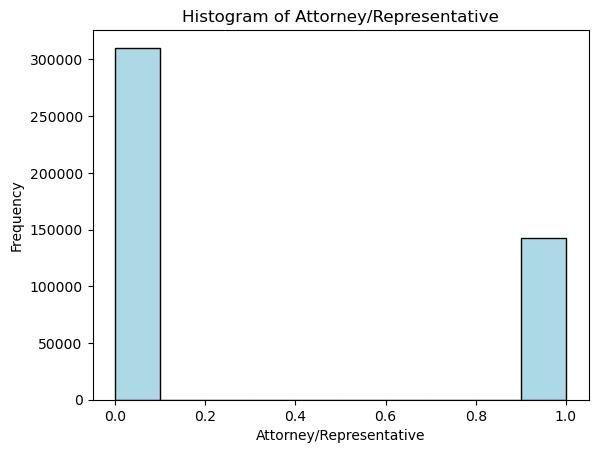

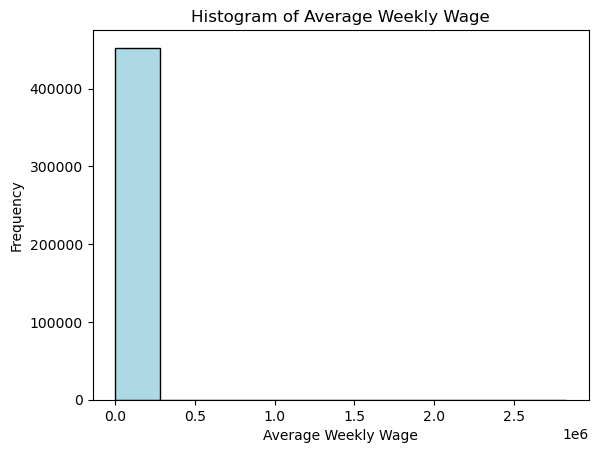

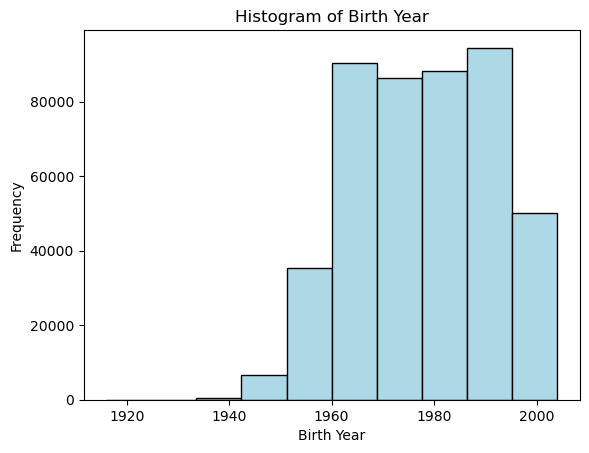

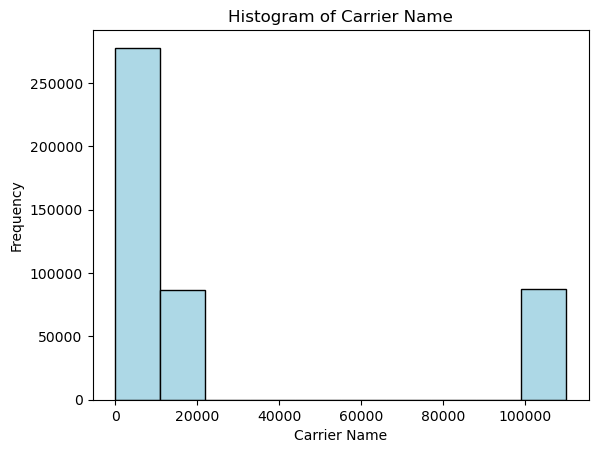

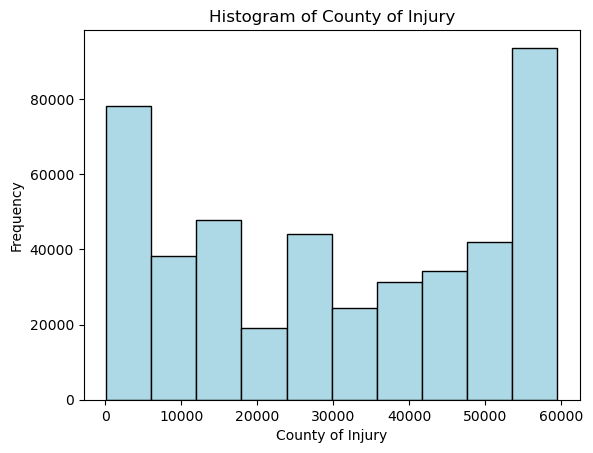

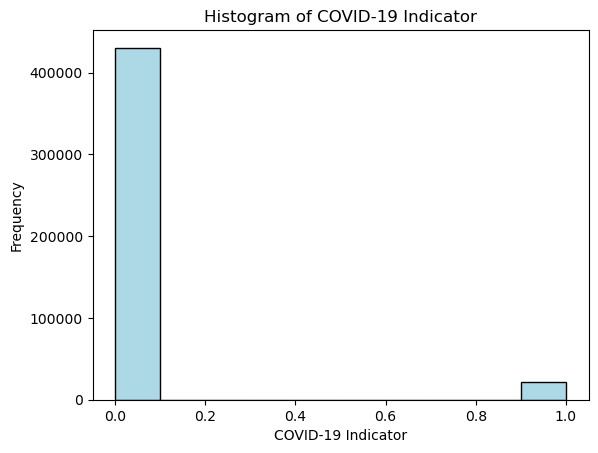

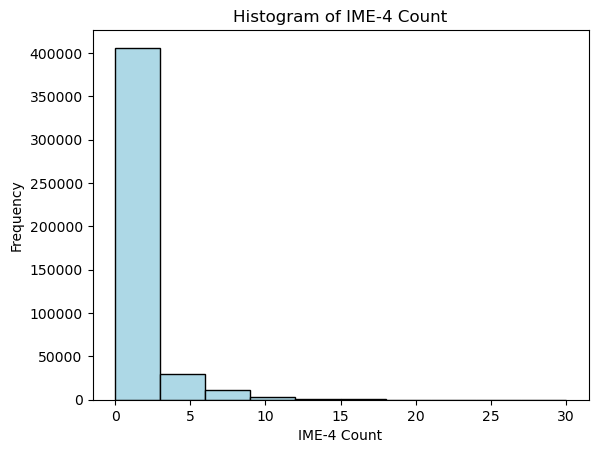

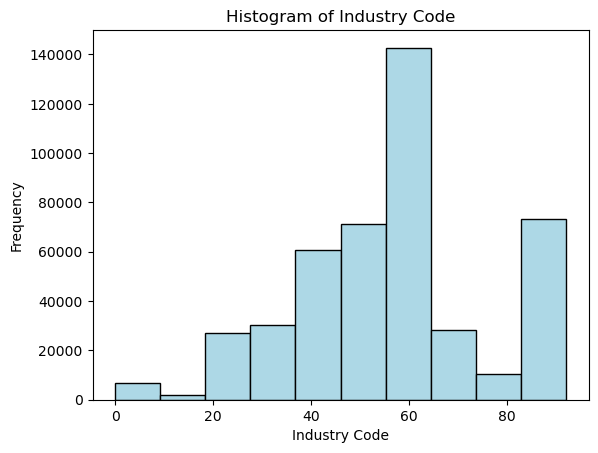

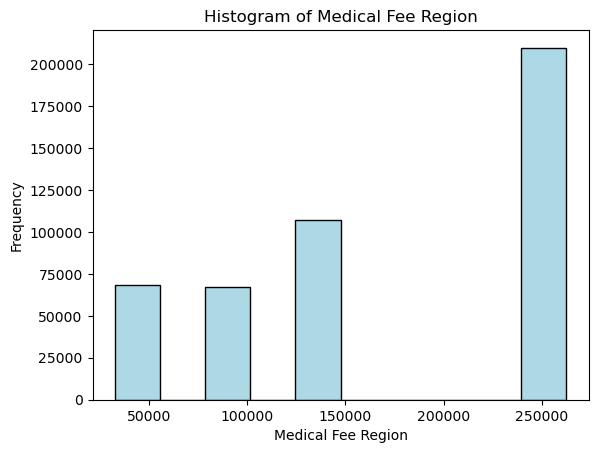

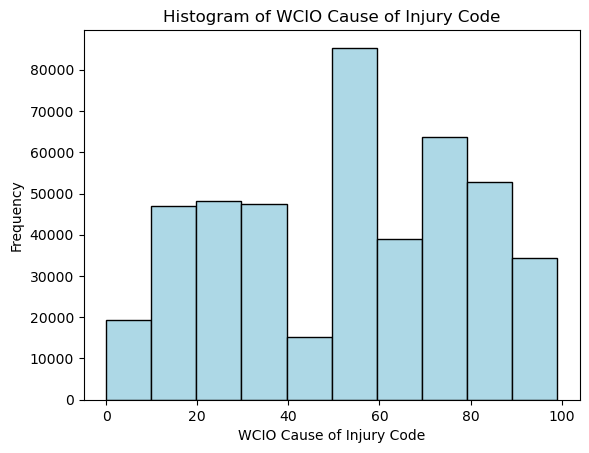

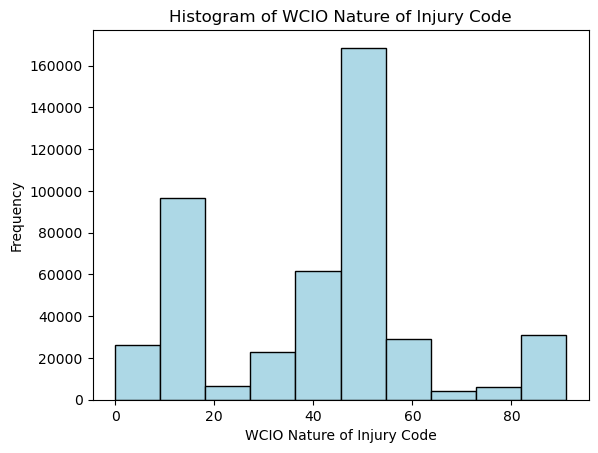

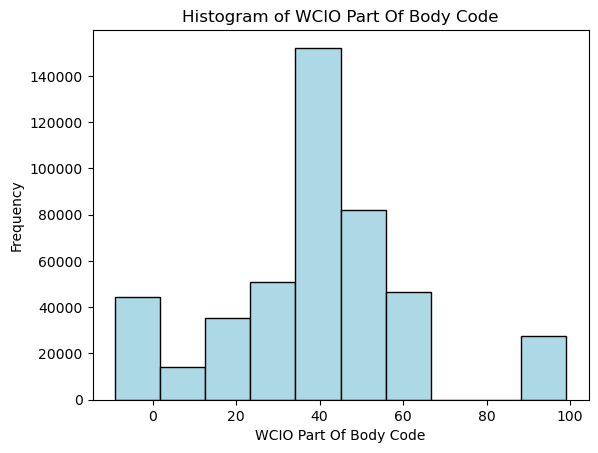

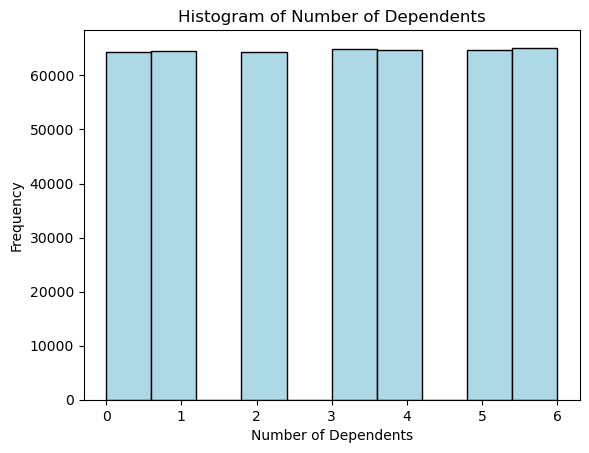

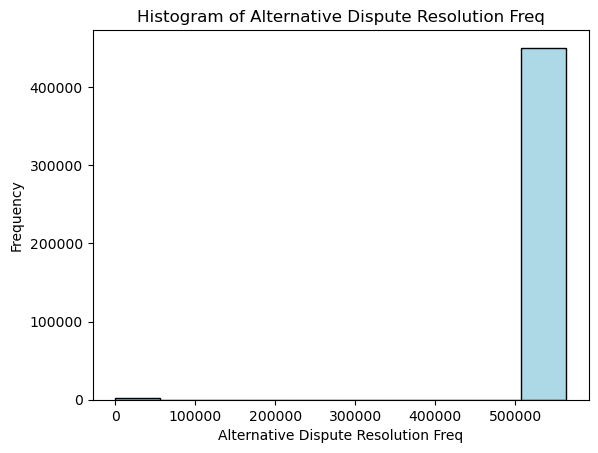

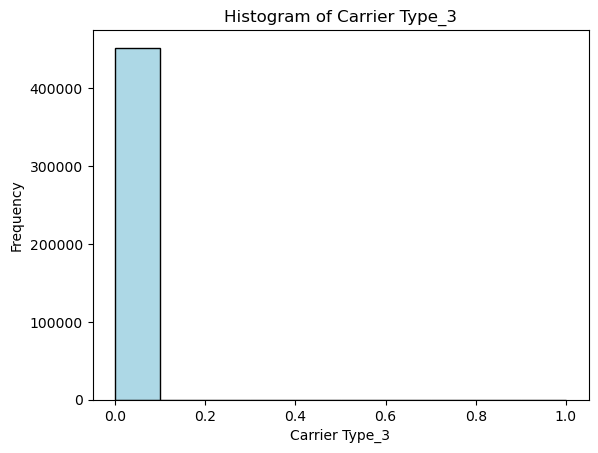

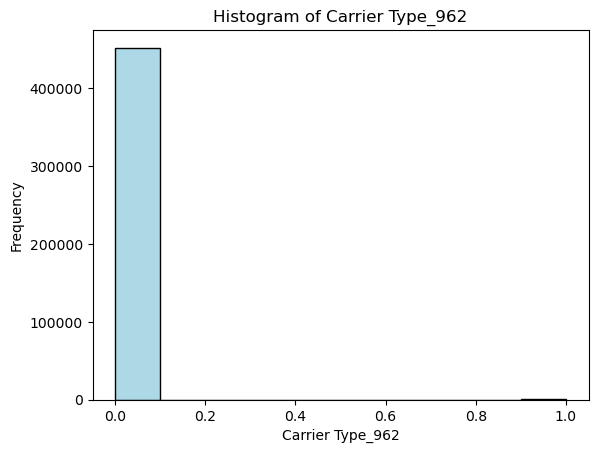

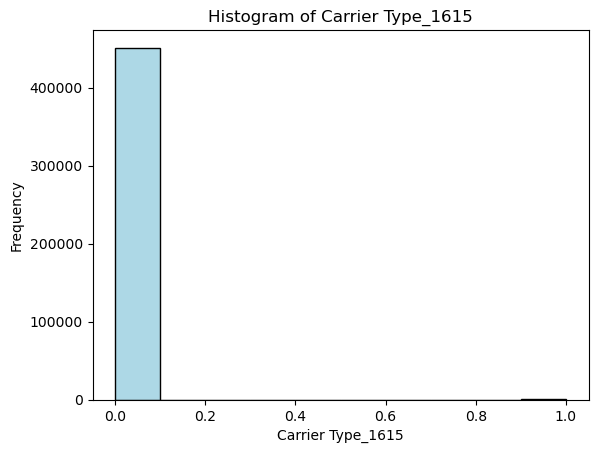

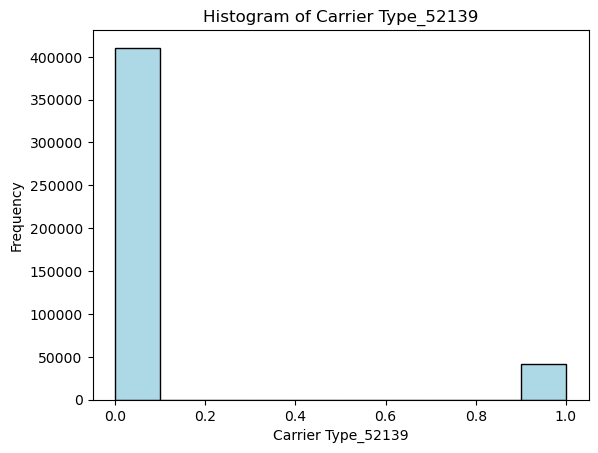

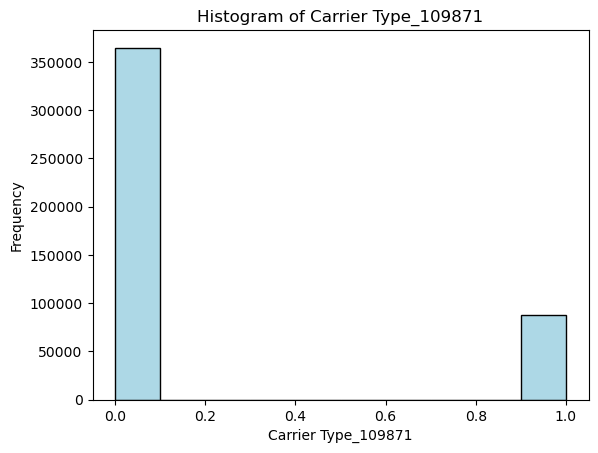

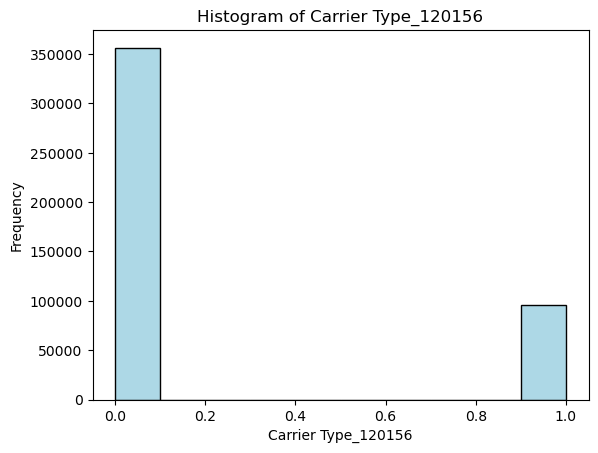

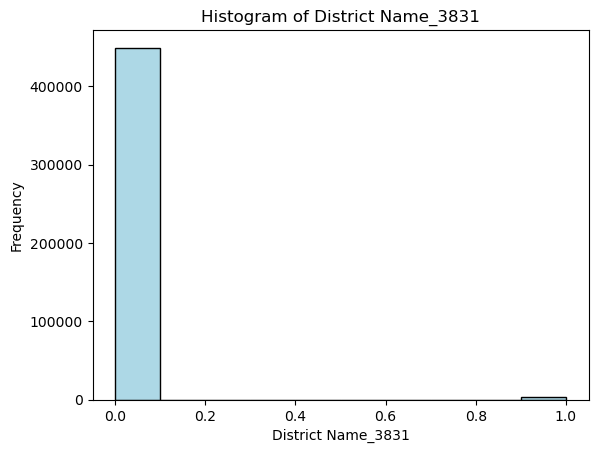

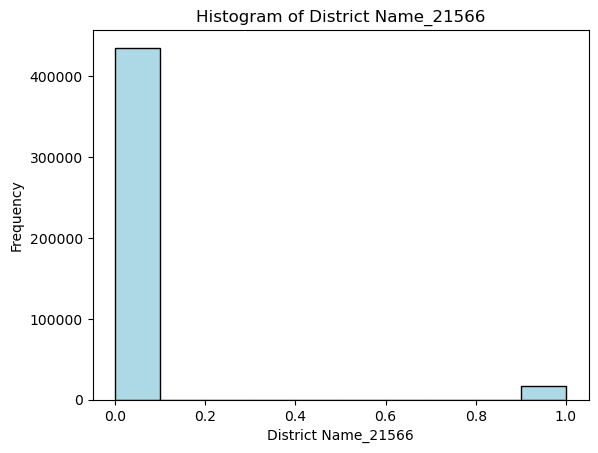

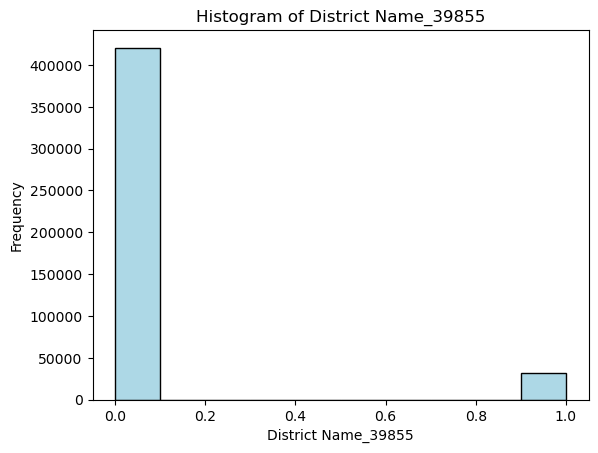

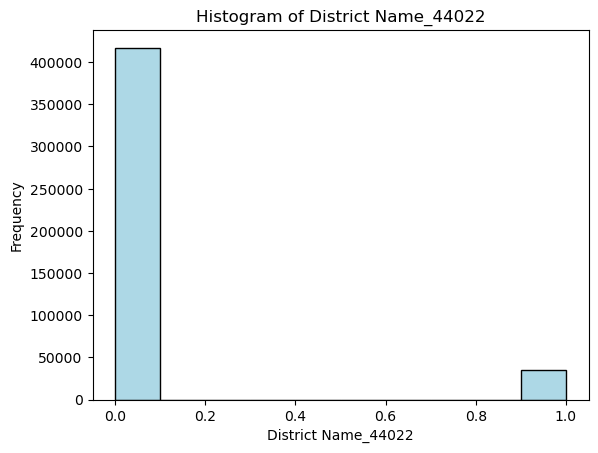

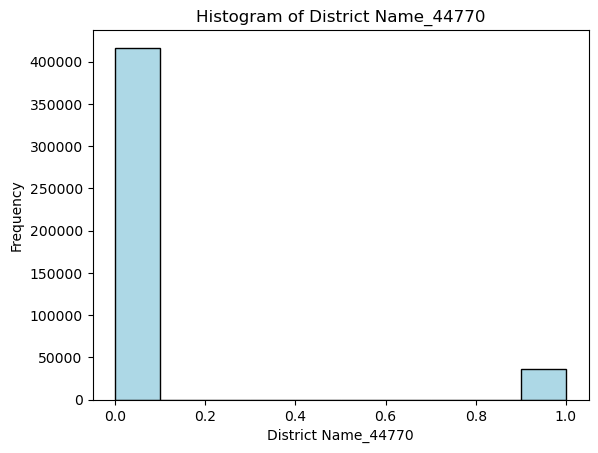

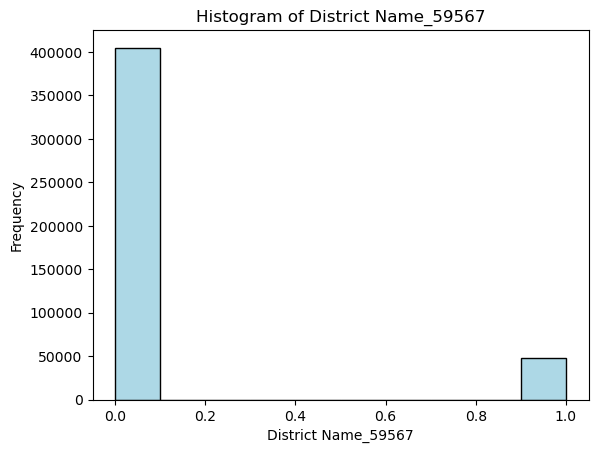

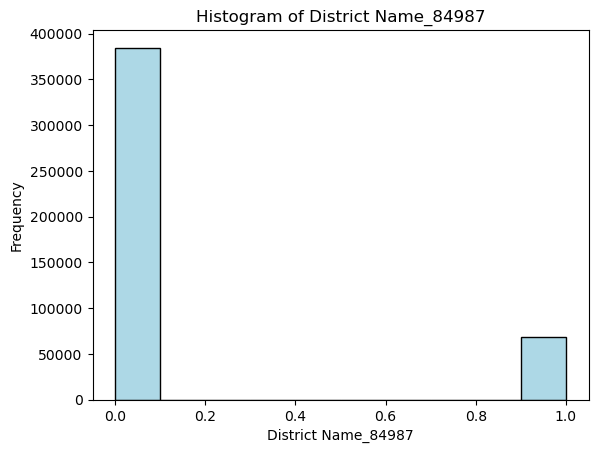

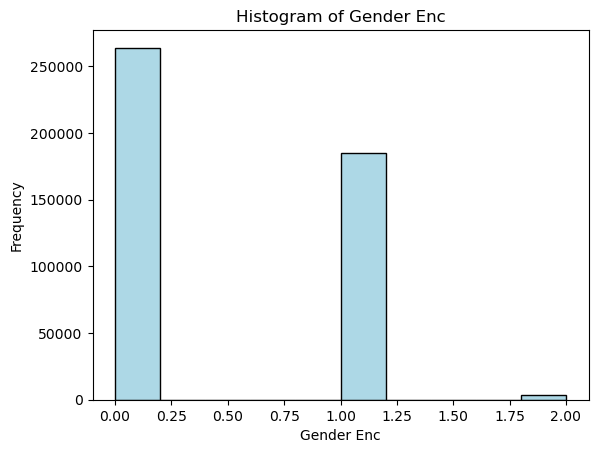

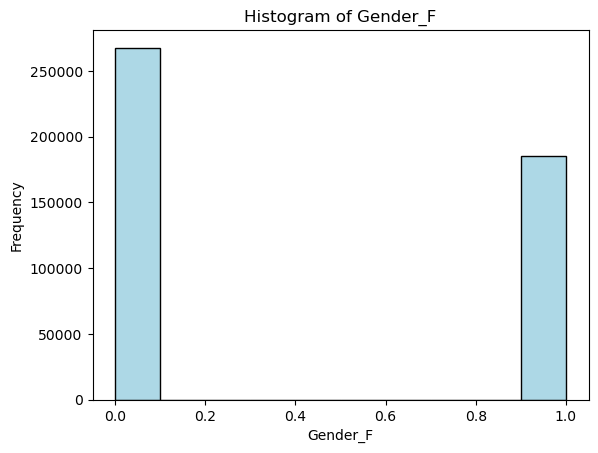

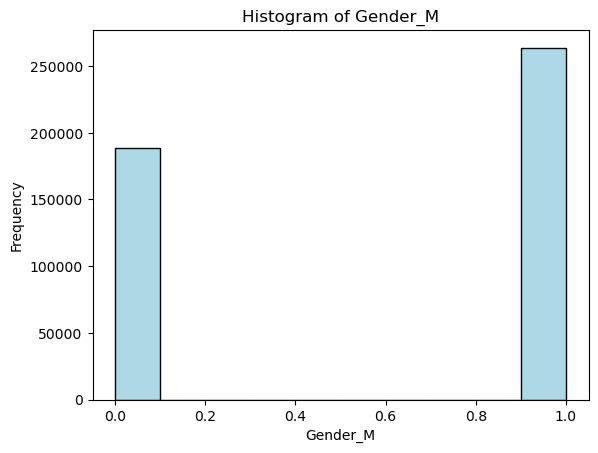

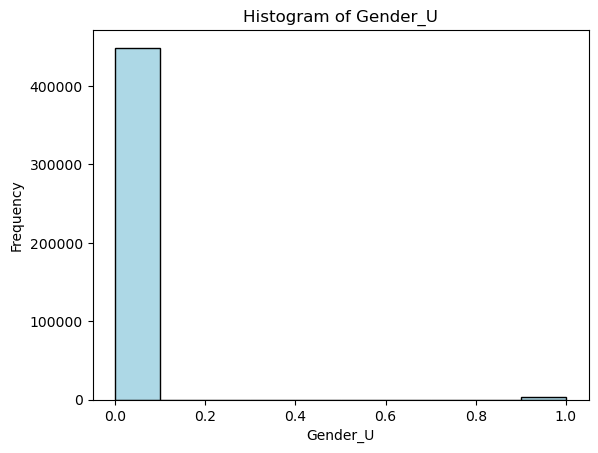

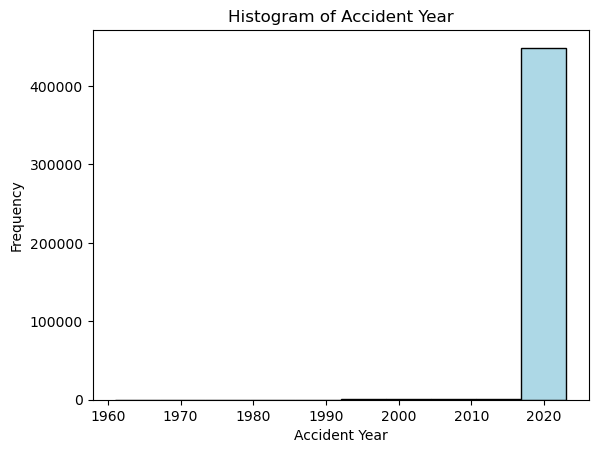

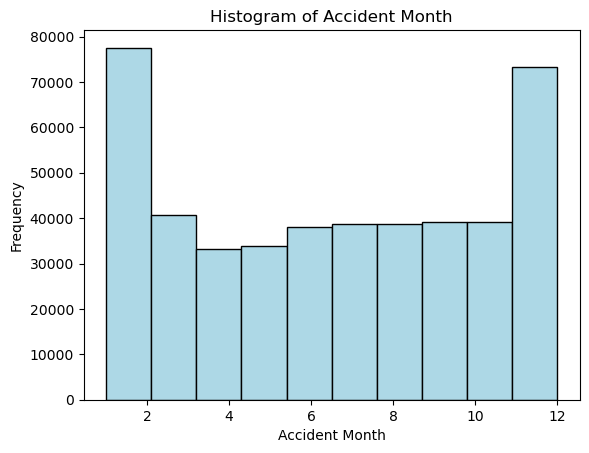

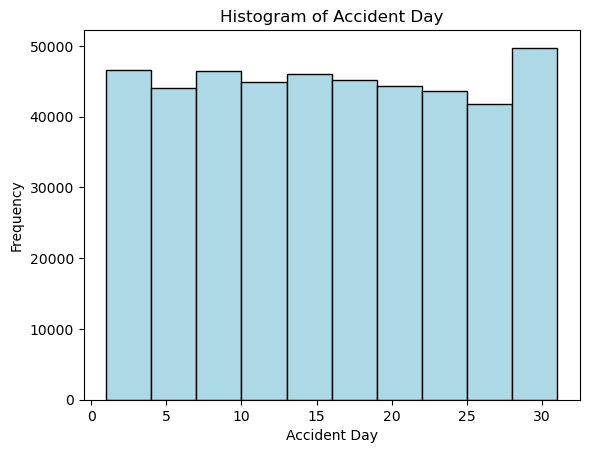

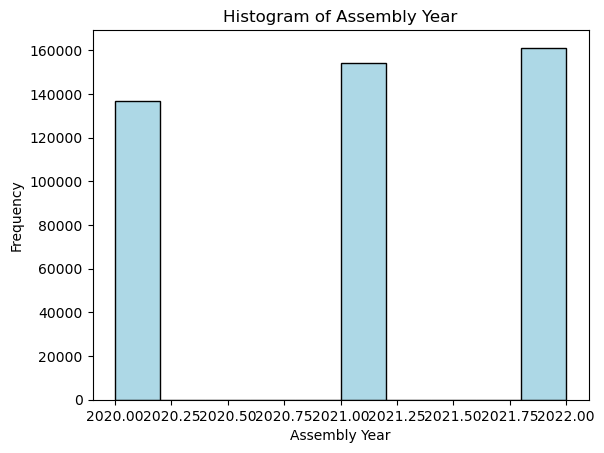

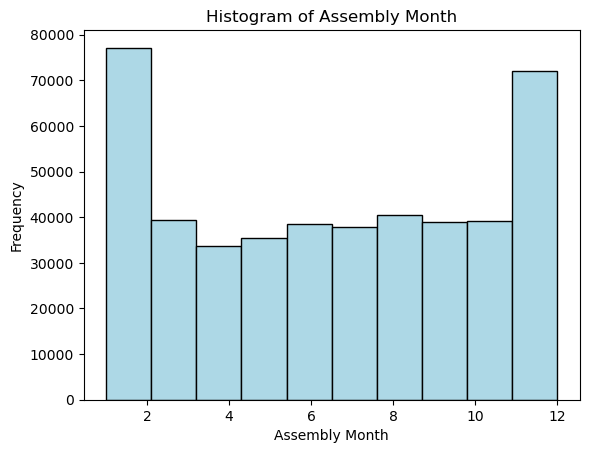

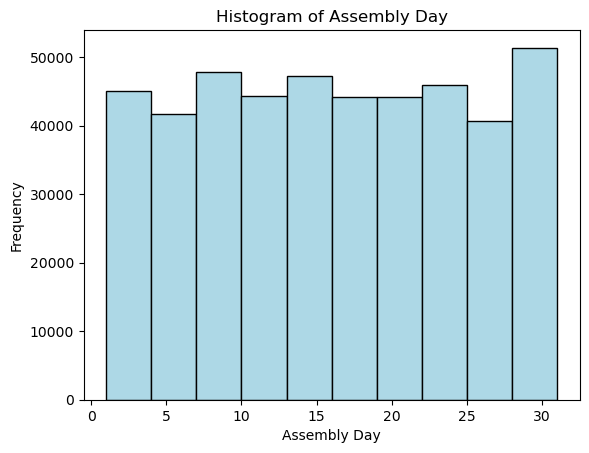

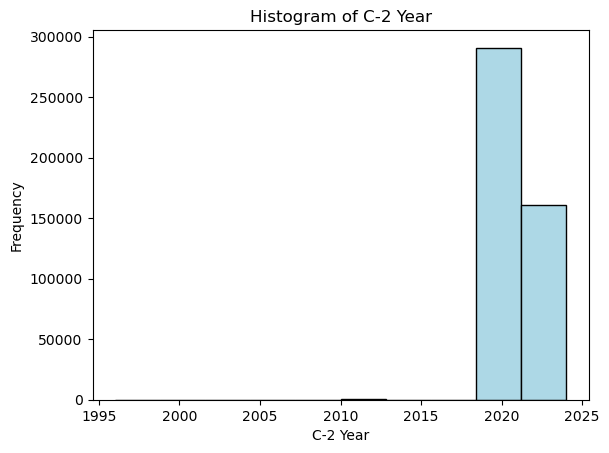

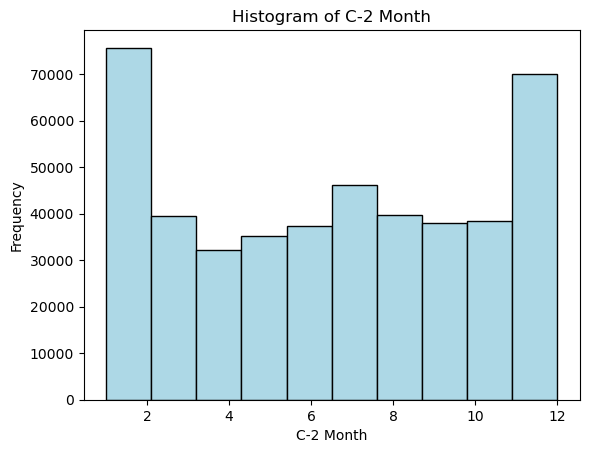

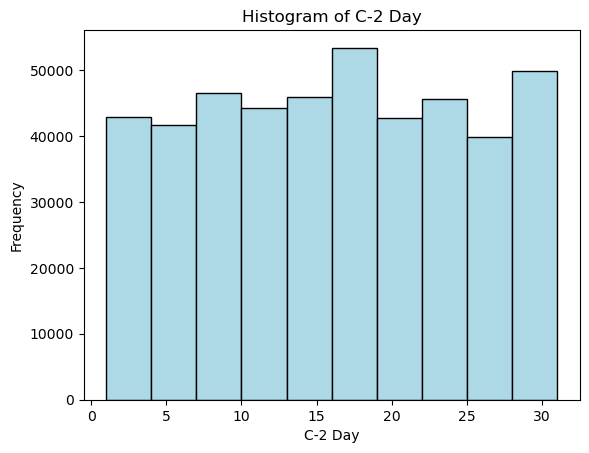

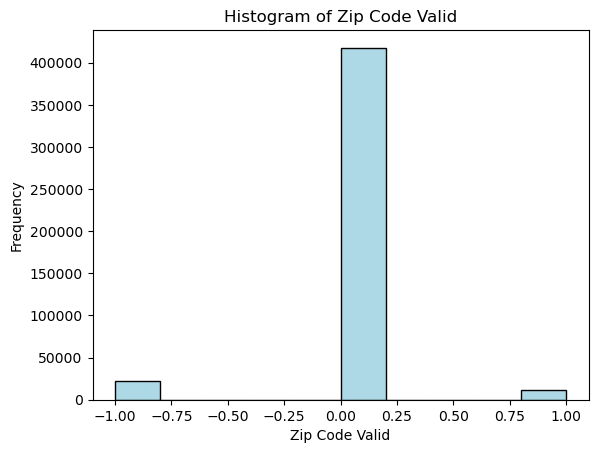

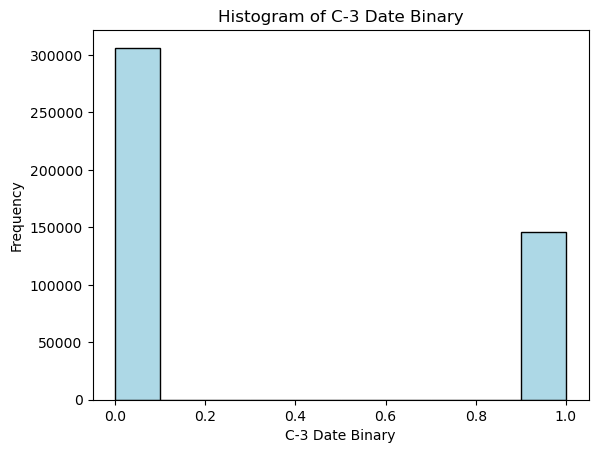

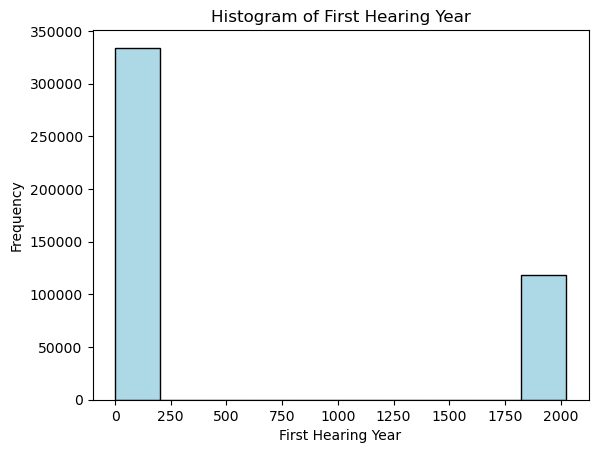

In [111]:
for column in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[column]):
            v.plot_histogram(X_train[column], 
                           xlabel=column, 
                           ylabel='Frequency', 
                           title=f'Histogram of {column}', 
                           color='lightblue')

**Interquartile Range**

In [112]:
p.detect_outliers_iqr(X_train, missing_threshold = 10)

Column: Age at Injury - Number of Outliers: 0
Column: Age at Injury - % of Outliers: 0.0% 

Column: Alternative Dispute Resolution - Number of Outliers: 2058
Column: Alternative Dispute Resolution - % of Outliers: 0.45480461964808994% 

Column: Attorney/Representative - Number of Outliers: 0
Column: Attorney/Representative - % of Outliers: 0.0% 

Column: Average Weekly Wage - Number of Outliers: 17656
Column: Average Weekly Wage - % of Outliers: 3.9018612072432832% 

Column: Birth Year - Number of Outliers: 39
Column: Birth Year - % of Outliers: 0.008618746436479838% 

Column: Carrier Name - Number of Outliers: 87713
Column: Carrier Name - % of Outliers: 19.384002722639902% 

Column: County of Injury - Number of Outliers: 0
Column: County of Injury - % of Outliers: 0.0% 

Column: COVID-19 Indicator - Number of Outliers: 21984
Column: COVID-19 Indicator - % of Outliers: 4.858321068194173% 

Column: IME-4 Count - Number of Outliers: 105573
Column: IME-4 Count - % of Outliers: 23.33094660

In [114]:
# Check if the target column exists in X_train
print(X_train.columns.tolist())  # Replace X_train with the actual DataFrame you're using if different

['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'Birth Year', 'Carrier Name', 'County of Injury', 'COVID-19 Indicator', 'IME-4 Count', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents', 'Alternative Dispute Resolution Freq', 'Carrier Type_3', 'Carrier Type_962', 'Carrier Type_1615', 'Carrier Type_52139', 'Carrier Type_109871', 'Carrier Type_120156', 'District Name_3831', 'District Name_21566', 'District Name_39855', 'District Name_44022', 'District Name_44770', 'District Name_59567', 'District Name_84987', 'Gender Enc', 'Gender_F', 'Gender_M', 'Gender_U', 'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year', 'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 'C-2 Day', 'Zip Code Valid', 'Zip Code Numbers', 'C-3 Date Binary', 'First Hearing Year']


KeyError: 'Carrier Type_2A. SIF'

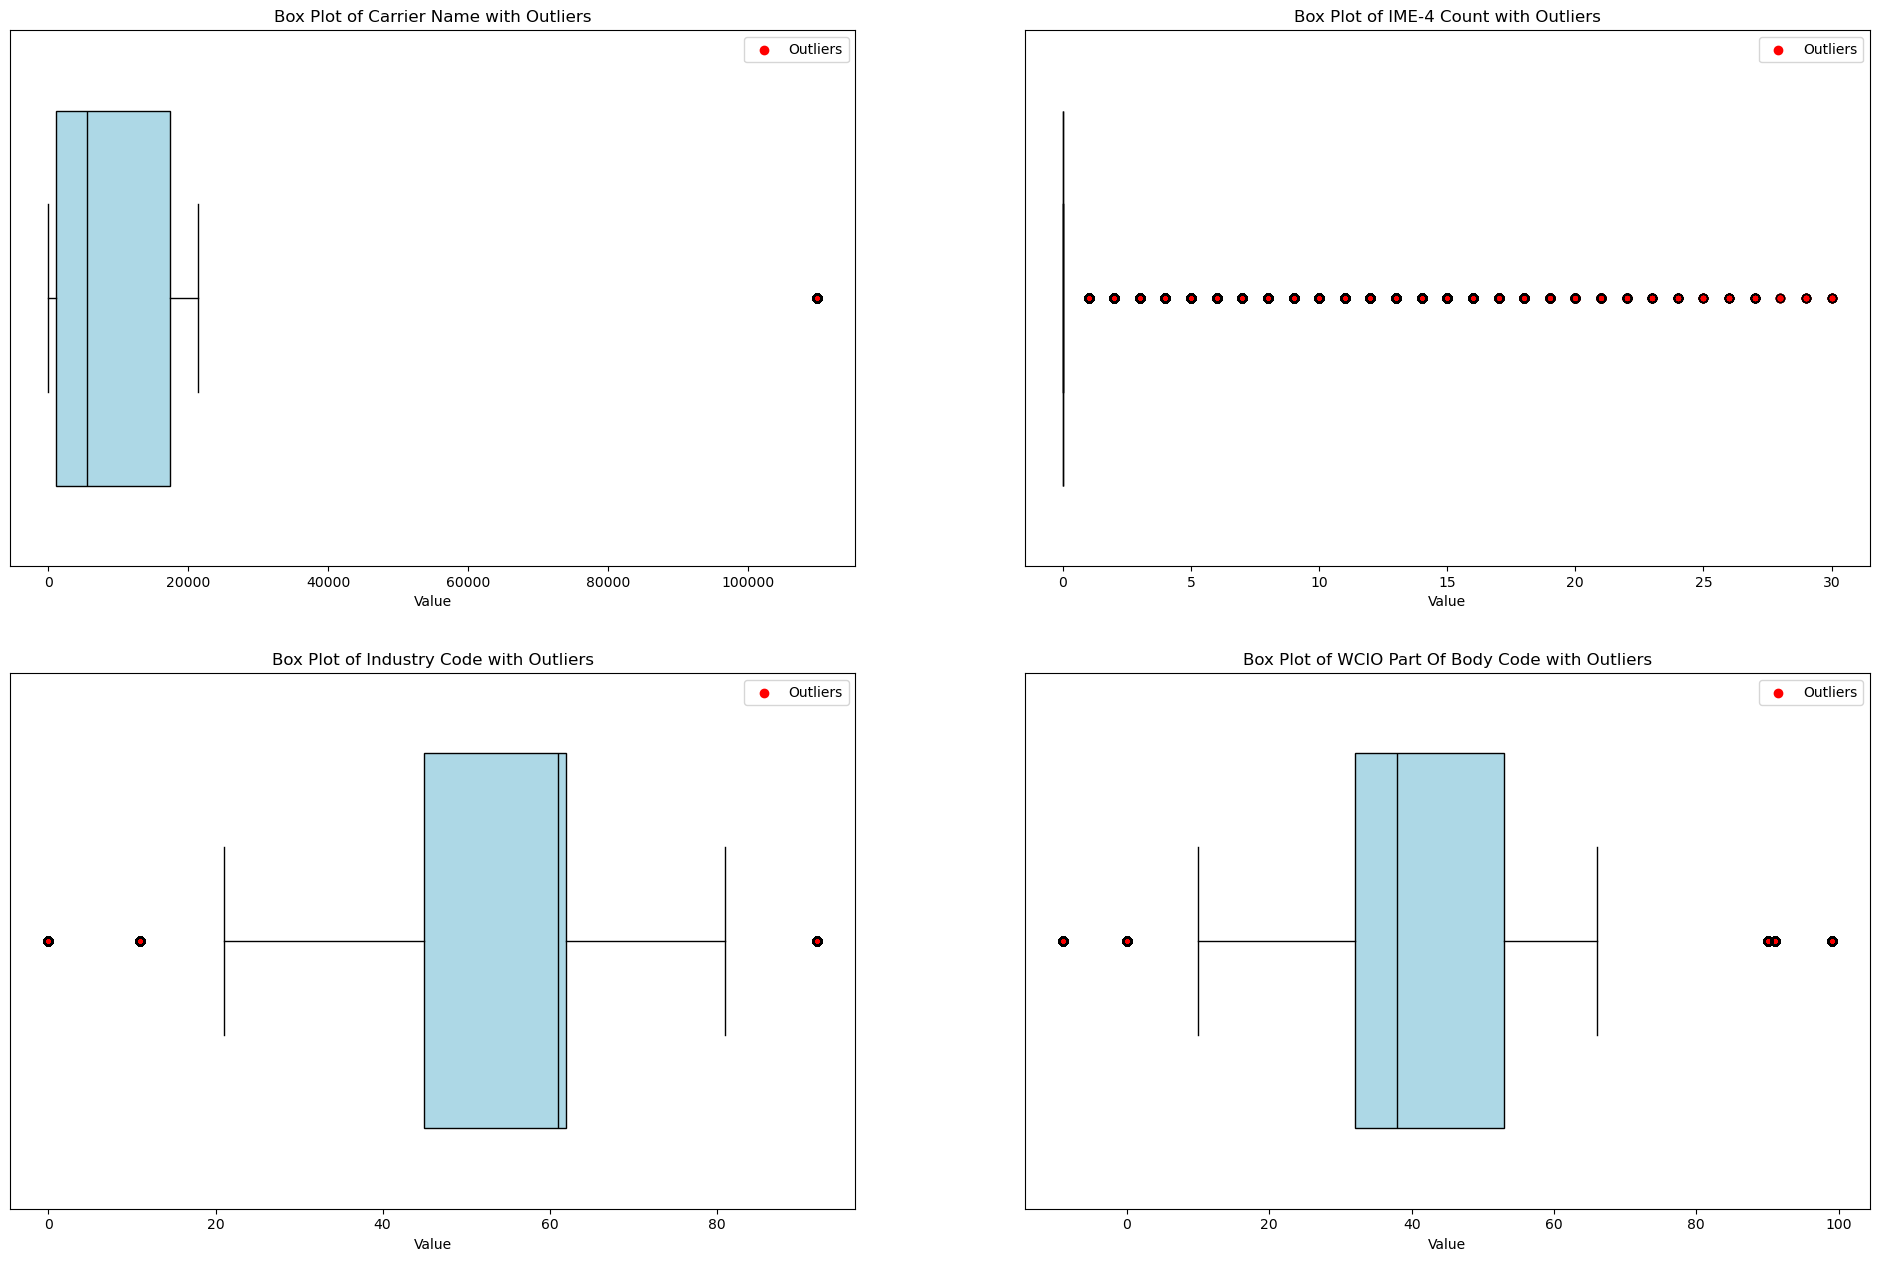

In [ ]:
#columns = ['Carrier Name', 'IME-4 Count', 'Industry Code', 
#    'WCIO Part Of Body Code', 'Carrier Type_3', 
#    'Carrier Type_962', 'Carrier Type_1615', 
#    'District Name_3831', 'District Name_21566']

columns = ['Carrier Name', 'IME-4 Count', 'Industry Code', 
           'WCIO Part Of Body Code', 'Carrier Type_2A. SIF', 
           'Carrier Type_3A. SELF PUBLIC', 'District Name_ALBANY', 
           'District Name_HAUPPAUGE']

v.boxplot_out(X_train, columns = columns, ncols = 2)

Doesnt make sense to apply log to some of the `Code`columns and not to other. Try to apply log on `Carrier Name`and `IME-4 Count`.

In [116]:
#X_train['Carrier Name Log'] = np.log(X_train['Carrier Name'] + 1)
X_train['IME-4 Count Log'] = np.log(X_train['IME-4 Count'] + 1)

In [117]:
#X_val['Carrier Name Log'] = np.log(X_val['Carrier Name'] + 1)
X_val['IME-4 Count Log'] = np.log(X_val['IME-4 Count'] + 1)

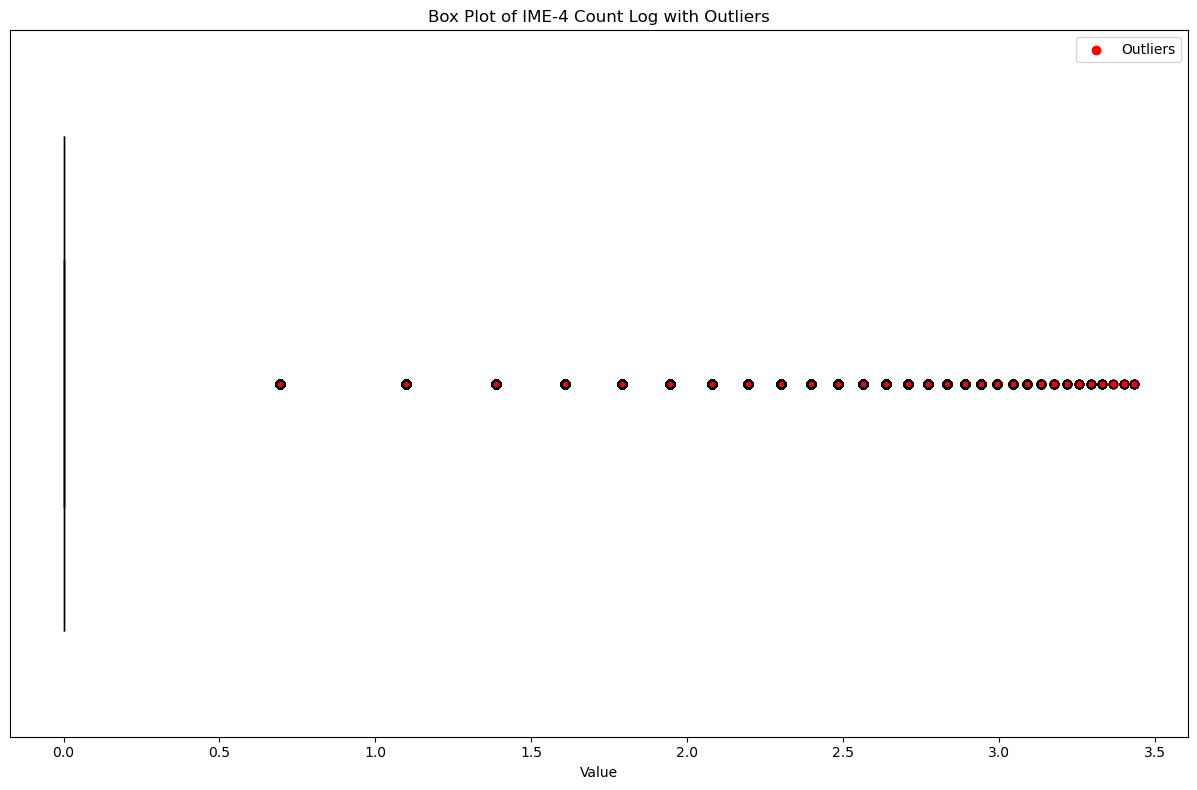

In [118]:
columns = ['IME-4 Count Log']

v.boxplot_out(X_train, columns = columns, ncols = 2)

still show outliers. keep and choose in feature selection 

## 3.6 Visualisations

<a href="#top">Top &#129033;</a>

In [119]:
all_train = pd.concat([X_train, y_train], axis=1)
all_train.head(2)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,County of Injury,COVID-19 Indicator,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Alternative Dispute Resolution Freq,Carrier Type_3,Carrier Type_962,Carrier Type_1615,Carrier Type_52139,Carrier Type_109871,Carrier Type_120156,District Name_3831,District Name_21566,District Name_39855,District Name_44022,District Name_44770,District Name_59567,District Name_84987,Gender Enc,Gender_F,Gender_M,Gender_U,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,Zip Code Valid,Zip Code Numbers,C-3 Date Binary,First Hearing Year,IME-4 Count Log,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5400441,51.0,0.0,0,0.00,1968.0,5556,39161,0,0.0,62.0,262344,89.0,10.0,18.0,0.0,563038,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,2020,1,3,2020,1,9,2020.0,1.0,9.0,0,10466,0,0,0.000000,2
6051592,33.0,0.0,1,1125.46,1989.0,2111,42924,0,2.0,48.0,262344,58.0,52.0,53.0,4.0,563038,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2022,7,14,2022,8,2,2022.0,8.0,2.0,0,11003,1,2022,1.098612,4


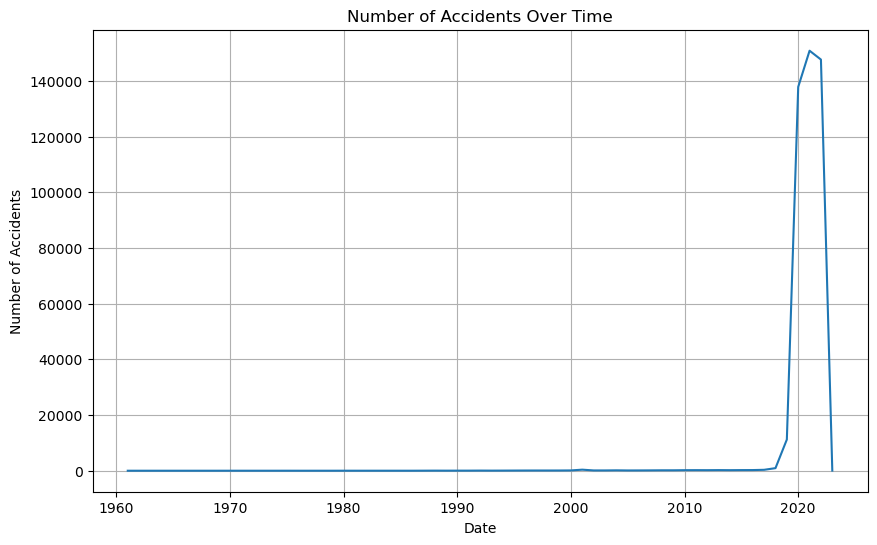

In [120]:
accident_counts = all_train['Accident Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(accident_counts.index, accident_counts.values)
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks()
plt.grid(True)
plt.show()

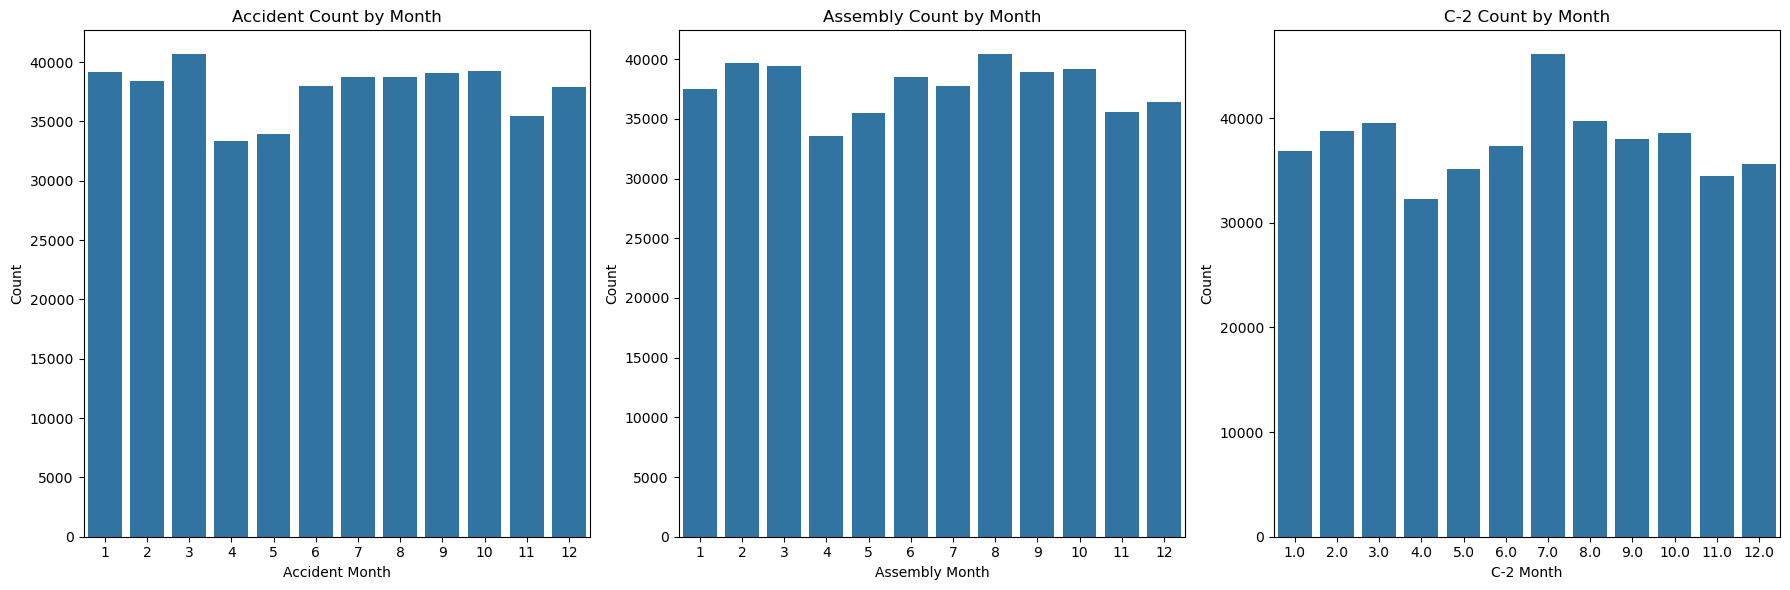

In [121]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot: Accident Month
sns.countplot(data=all_train, x='Accident Month', ax=axes[0])
axes[0].set_title('Accident Count by Month')
axes[0].set_xlabel('Accident Month')
axes[0].set_ylabel('Count')

# Second subplot: Assembly Month
sns.countplot(data=all_train, x='Assembly Month', ax=axes[1])
axes[1].set_title('Assembly Count by Month')
axes[1].set_xlabel('Assembly Month')
axes[1].set_ylabel('Count')

# Third subplot: C-2 Month
sns.countplot(data=all_train, x='C-2 Month', ax=axes[2])
axes[2].set_title('C-2 Count by Month')
axes[2].set_xlabel('C-2 Month')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

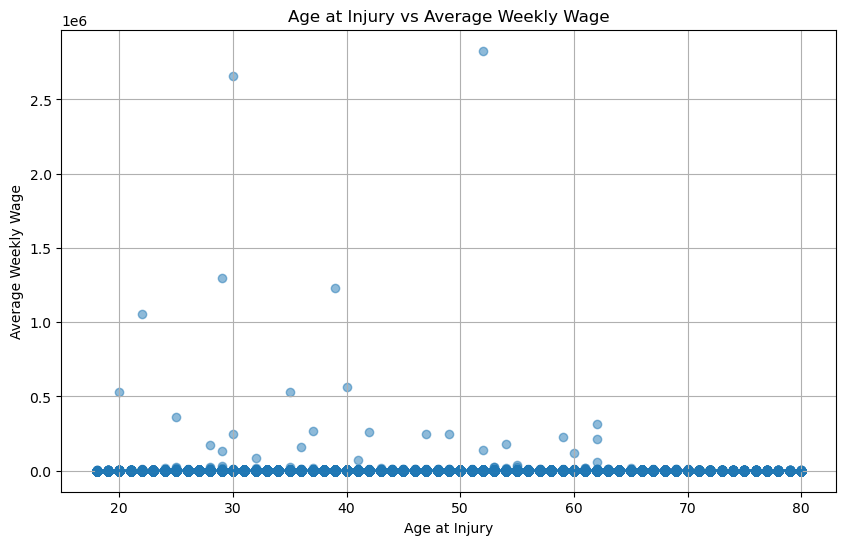

In [122]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age at Injury', y='Average Weekly Wage', data=all_train, scatter_kws={'alpha':0.5})

# Set the labels and title
plt.title('Age at Injury vs Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')

# Show the plot
plt.grid(True)
plt.show()

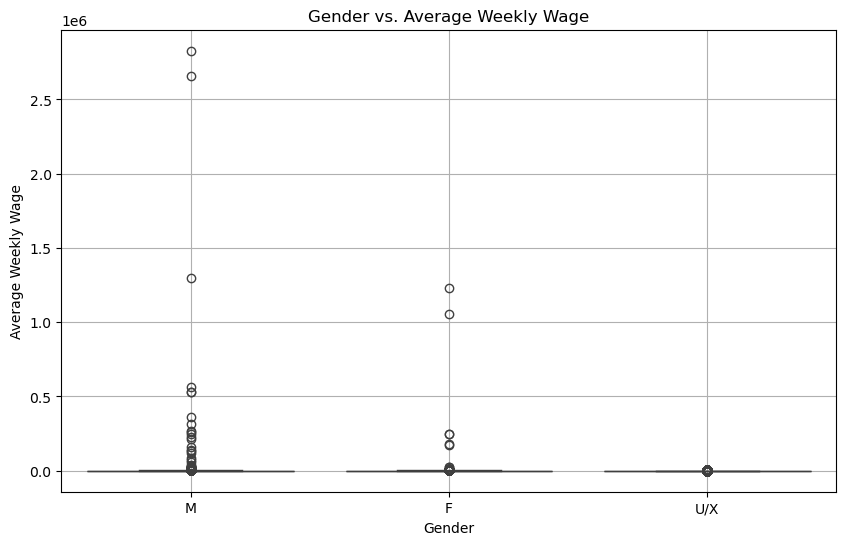

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_train, x='Gender Enc', y='Average Weekly Wage')
plt.xticks(ticks=[0, 1, 2], labels=['M', 'F', 'U/X']) 
plt.title('Gender vs. Average Weekly Wage')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
plt.show()

In [124]:
# como o carrier type foi encoded os labels deste gráfico ficam um pouco estranhos

# plt.figure(figsize=(10, 6))
# sns.boxplot(data=all_train, x='Carrier Type freq', y='Age at Injury')
# plt.xticks(ticks=[3, 3, 962, 1615, 52139, 109871, 120156, 280879], 
#            labels=['']) 
# plt.title('Carrier Type vs. Age at Injury')
# plt.xlabel('Carrier Type')
# plt.ylabel('Age at Injury')
# plt.xticks(rotation=30) 
# plt.grid(True)
# plt.show()

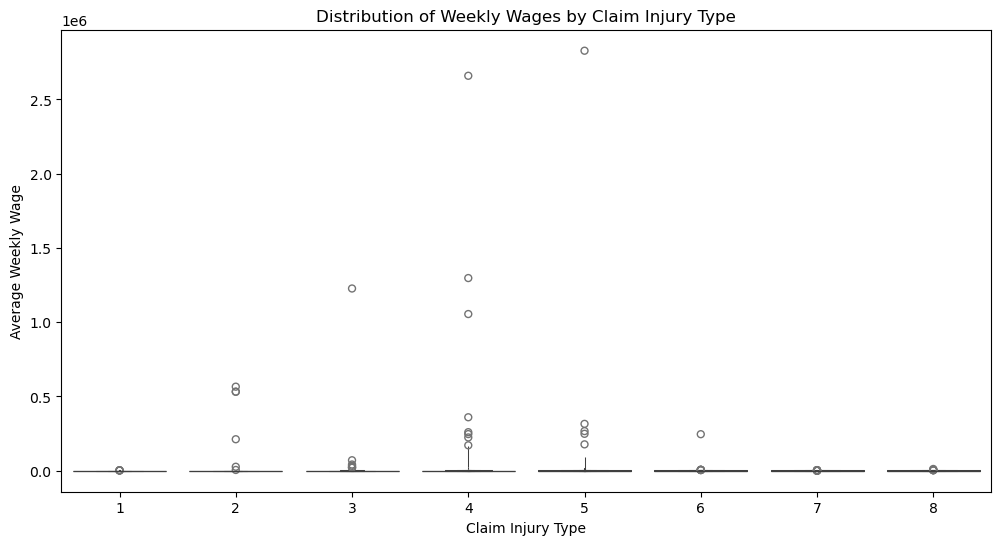

In [125]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x="Claim Injury Type", y="Average Weekly Wage", data=all_train)
plt.title("Distribution of Weekly Wages by Claim Injury Type")
plt.show()

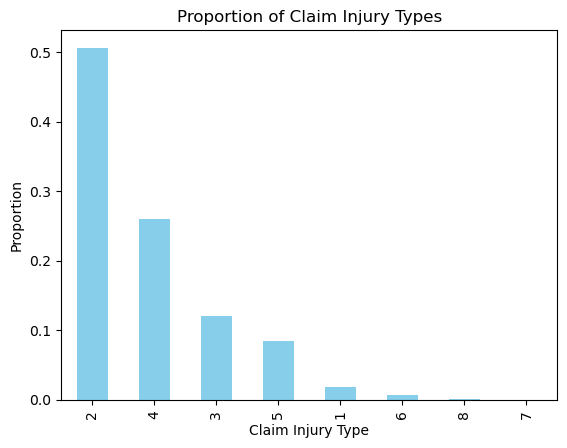

In [141]:
all_train["Claim Injury Type"].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title("Proportion of Claim Injury Types")
plt.xlabel("Claim Injury Type")
plt.ylabel("Proportion")
plt.show()

# 4. Feature Selection

<a href="#top">Top &#129033;</a>

**Split Numerical and Categorical Variables**

In [142]:
# num = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 
#       'IME-4 Count', 'Number of Dependents', 'Accident Year', 
#       'Accident Month', 'Accident Day', 'Assembly Year', 
#       'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 
#       'C-2 Day','First Hearing Year', 'IME-4 Count Log']

#categ = ['Alternative Dispute Resolution', 'Attorney/Representative',
#         'Carrier Name', 'County of Injury', 'COVID-19 Indicator', 
#         'Industry Code', 'Medical Fee Region',
#         'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
#         'WCIO Part Of Body Code', 'Alternative Dispute Resolution Freq',
#         'Carrier Type freq', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 
#         'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE',
#         'Carrier Type_5. SPECIAL FUND', 'District Name freq', 'District Name_ALBANY',
#         'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 
#         'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'Gender Enc',
#         'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 
#         'Zip Code Numbers', 'C-3 Date Binary']

num = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 
    'IME-4 Count', 'Number of Dependents', 'Accident Year', 
    'Accident Month', 'Accident Day', 'Assembly Year', 
    'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 
    'C-2 Day', 'First Hearing Year'
]

categ = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name', 'County of Injury', 'COVID-19 Indicator', 
    'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 
    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 
    'Alternative Dispute Resolution Freq', 'Carrier Type_3', 
    'Carrier Type_962', 'Carrier Type_1615', 'Carrier Type_52139', 
    'Carrier Type_109871', 'Carrier Type_120156', 'District Name_3831', 
    'District Name_21566', 'District Name_39855', 'District Name_44022', 
    'District Name_44770', 'District Name_59567', 'District Name_84987', 
    'Gender Enc', 'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 
    'Zip Code Numbers', 'C-3 Date Binary'
]

## 4.1 Scaling

<a href="#top">Top &#129033;</a>

**Standard Scaler**

In [143]:
standard = StandardScaler()
X_train_SS = standard.fit_transform(X_train[num])
X_train_SS = pd.DataFrame(X_train_SS, columns=num, index=X_train.index)

In [144]:
X_train_SS.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,First Hearing Year
count,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05,4.525020e+05
mean,1.281013e-16,-6.759940e-18,4.592551e-15,-3.375259e-17,1.461121e-17,8.846650e-16,-1.049871e-16,-6.670436e-17,-1.062586e-13,-1.121161e-16,2.795051e-17,6.109975e-14,7.185479e-17,5.106464e-17,1.406868e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.812936e+00,-7.396843e-02,-4.533403e+00,-3.906948e-01,-1.503117e+00,-3.331113e+01,-1.584372e+00,-1.653341e+00,-1.300560e+00,-1.594035e+00,-1.676709e+00,-2.368569e+01,-1.609737e+00,-1.701875e+00,-5.957874e-01
25%,-8.530735e-01,-7.396843e-02,-7.957416e-01,-3.906948e-01,-1.003233e+00,-4.665345e-01,-1.007472e+00,-8.560410e-01,-1.300560e+00,-1.013224e+00,-8.753531e-01,-9.877169e-01,-1.023249e+00,-8.897966e-01,-5.957874e-01
50%,-4.088252e-02,-7.396843e-02,1.042070e-02,-3.906948e-01,-3.466580e-03,9.015354e-02,1.463258e-01,-5.874140e-02,-6.596658e-02,1.483960e-01,4.048201e-02,-4.196807e-02,1.497268e-01,3.829275e-02,-5.957874e-01
75%,8.451440e-01,4.929811e-02,8.165830e-01,-3.906948e-01,9.963003e-01,6.468416e-01,7.232250e-01,8.524581e-01,1.168627e+00,7.292062e-01,8.418377e-01,9.037807e-01,7.362149e-01,8.503709e-01,1.676509e+00
max,2.764868e+00,4.120988e+02,1.915895e+00,1.526688e+01,1.496184e+00,1.203530e+00,1.588574e+00,1.763658e+00,1.168627e+00,1.600421e+00,1.757673e+00,2.795278e+00,1.615947e+00,1.778460e+00,1.681009e+00


**MinMax Scaler**

In [145]:
minmax = MinMaxScaler()
X_train_MM = minmax.fit_transform(X_train[num])
X_train_MM = pd.DataFrame(X_train_MM, columns=num, index=X_train.index)

In [146]:
X_train_MM.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,First Hearing Year
count,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000
mean,0.396027,0.000179,0.702930,0.024952,0.501156,0.965130,0.499338,0.483858,0.526716,0.499000,0.488213,0.894442,0.499037,0.488997,0.261678
std,0.218446,0.002426,0.155056,0.063867,0.333411,0.028973,0.315165,0.292655,0.404992,0.313043,0.291174,0.037763,0.310012,0.287329,0.439214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209677,0.000000,0.579545,0.000000,0.166667,0.951613,0.181818,0.233333,0.000000,0.181818,0.233333,0.857143,0.181818,0.233333,0.000000
50%,0.387097,0.000000,0.704545,0.000000,0.500000,0.967742,0.545455,0.466667,0.500000,0.545455,0.500000,0.892857,0.545455,0.500000,0.000000
75%,0.580645,0.000299,0.829545,0.000000,0.833333,0.983871,0.727273,0.733333,1.000000,0.727273,0.733333,0.928571,0.727273,0.733333,0.998024
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Robust Scaler**

In [147]:
robust = RobustScaler()
X_train_RS = robust.fit_transform(X_train[num])
X_train_RS = pd.DataFrame(X_train_RS, columns=num, index=X_train.index)

In [148]:
X_train_RS.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,First Hearing Year
count,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000,452502.000000
mean,0.024074,0.600069,-0.006463,0.748573,0.001734,-0.080973,-0.084547,0.034382,0.026716,-0.085166,-0.023575,0.022188,-0.085098,-0.022005,0.262196
std,0.588853,8.112511,0.620223,1.916008,0.500117,0.898170,0.577802,0.585310,0.404992,0.573912,0.582347,0.528682,0.568355,0.574658,0.440084
min,-1.043478,0.000000,-2.818182,0.000000,-0.750000,-30.000000,-1.000000,-0.933333,-0.500000,-1.000000,-1.000000,-12.500000,-1.000000,-1.000000,0.000000
25%,-0.478261,0.000000,-0.500000,0.000000,-0.500000,-0.500000,-0.666667,-0.466667,-0.500000,-0.666667,-0.533333,-0.500000,-0.666667,-0.533333,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.521739,1.000000,0.500000,0.000000,0.500000,0.500000,0.333333,0.533333,0.500000,0.333333,0.466667,0.500000,0.333333,0.466667,1.000000
max,1.652174,3343.752512,1.181818,30.000000,0.750000,1.000000,0.833333,1.066667,0.500000,0.833333,1.000000,1.500000,0.833333,1.000000,1.001980


### Summary of Scaling Methods for Numerical Data

#### 1. **RobustScaler**
- **Ideal for handling outliers**: The **RobustScaler** is best when working with data that contains outliers, as it scales based on the interquartile range (IQR), making it less sensitive to extreme values.
- **Example**: Features like **'IME-4 Count'** have large outliers that could distort the scaling. **RobustScaler** mitigates this issue.

#### 2. **StandardScaler**
- **Works well for normally distributed data**: The **StandardScaler** standardizes data by centering it with a mean of zero and scaling it by the standard deviation. It is effective when our data is normally distributed.
- **Example**: The feature **'Birth Year'** has a normal distribution and is well-centered using this scaler.

#### 3. **MinMaxScaler**
- **Sensitive to outliers**: The **MinMaxScaler** compresses data into a 0–1 range, but is vulnerable to outliers, which can significantly skew the result. It's most effective when applied to features with moderate ranges or when the model is sensitive to the feature range.
- **Example**: The **'Industry Code'** feature, with a moderate range, benefits from this transformation.

---

### Scaling Results Summary:

| Feature | **RobustScaler** | **StandardScaler** | **MinMaxScaler** |
|---------|------------------|--------------------|------------------|
| **Age at Injury** | Median-based scaling to handle outliers | Scaled to have mean = 0, std = 1 | Values between 0 and 1 |
| **Average Weekly Wage** | Robust to large outliers | Scaled but affected by outliers | Most values compressed due to extreme values |
| **Birth Year** | Handles skew in birth year data | Centered around mean | No major issues |
| **IME-4 Count** | Effective for highly skewed counts | Still influenced by outliers | Compression due to large counts |
| **Industry Code** | Efficient scaling due to moderate range | Normalized for centered values | All values mapped to 0–1 range |

---

### Recommendation:
Given that our dataset contains outliers in variables like **'IME-4 Count'** and **'Average Weekly Wage'**, the **RobustScaler** is the best choice for this scenario, in our opinion. It effectively handles skewed data without the influence of outliers. However, if we require data centering for algorithms that depend on normalized features, we can also consider using the **StandardScaler** after addressing outliers.


**Apply chosen Scaler to X_val**

In [149]:
X_val_RS = robust.transform(X_val[num])
X_val_RS = pd.DataFrame(X_val_RS, columns=num, index=X_val.index)

## 4.2 Filter-Based Methods

<a href="#top">Top &#129033;</a>

**Variance Threshold**

In [150]:
X_train_RS.var()

Age at Injury            0.346748
Average Weekly Wage     65.812828
Birth Year               0.384677
IME-4 Count              3.671086
Number of Dependents     0.250117
Accident Year            0.806709
Accident Month           0.333856
Accident Day             0.342587
Assembly Year            0.164018
Assembly Month           0.329375
Assembly Day             0.339128
C-2 Year                 0.279505
C-2 Month                0.323028
C-2 Day                  0.330232
First Hearing Year       0.193674
dtype: float64

In [151]:
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

X_train_high_variance = selector.fit_transform(X_train_RS)
print(f"Number of features before variance threshold: {X_train_RS.shape[1]}")

print(f"Number of features after variance threshold: {X_train_high_variance.shape[1]}")


Number of features before variance threshold: 15
Number of features after variance threshold: 15


**Spearman Correlation Matrix**

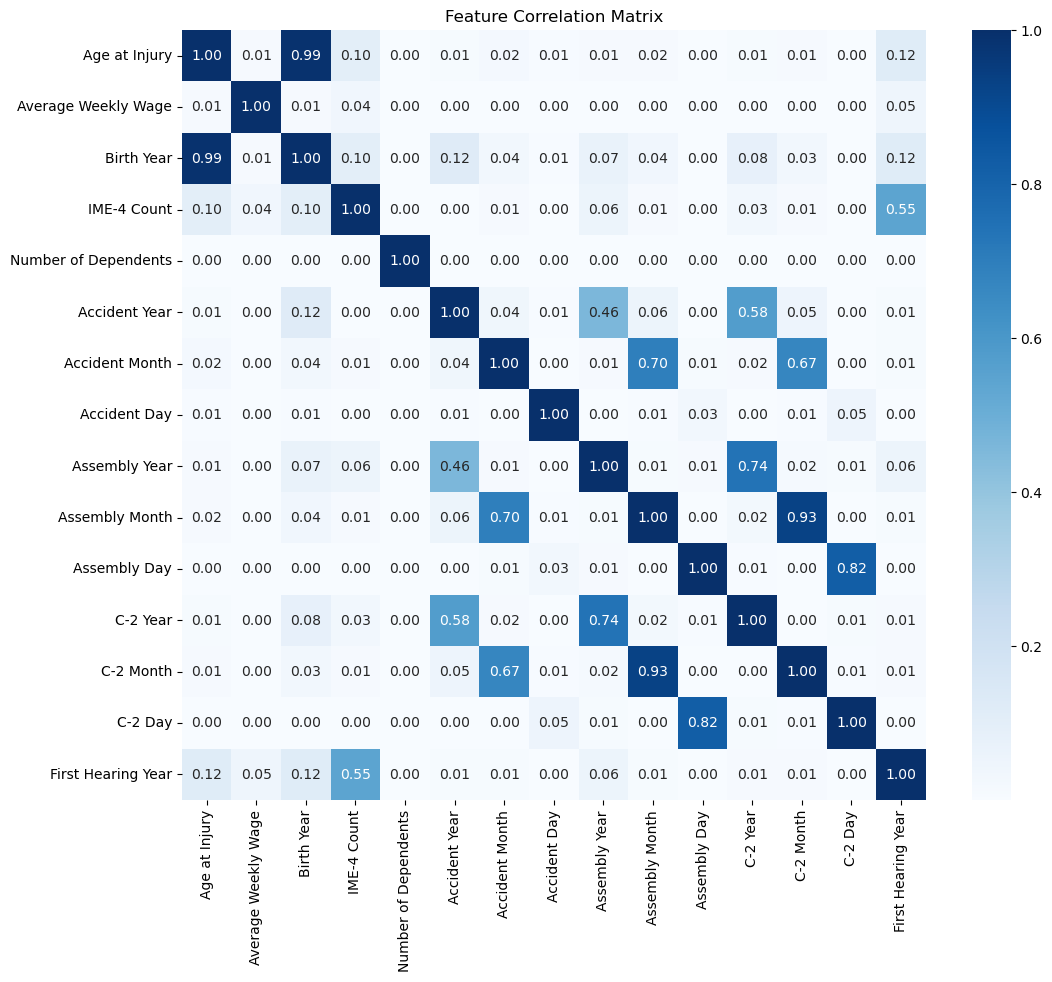

In [152]:
fs.correlation_matrix(X_train_RS, num)

**High Correlations**

| Var 1 | Var 2 | Correlation |
| ----- | ----- | ----------- |
| Birth Year | Age at Injury | 0.99 |
| C-2 Month | Assembly Month | 0.93 |
| IME-4 Count | IME-4 Count Log | 0.93|
| C-2 Day | Assembly Day | 0.82 |


**Chi Squared Test**

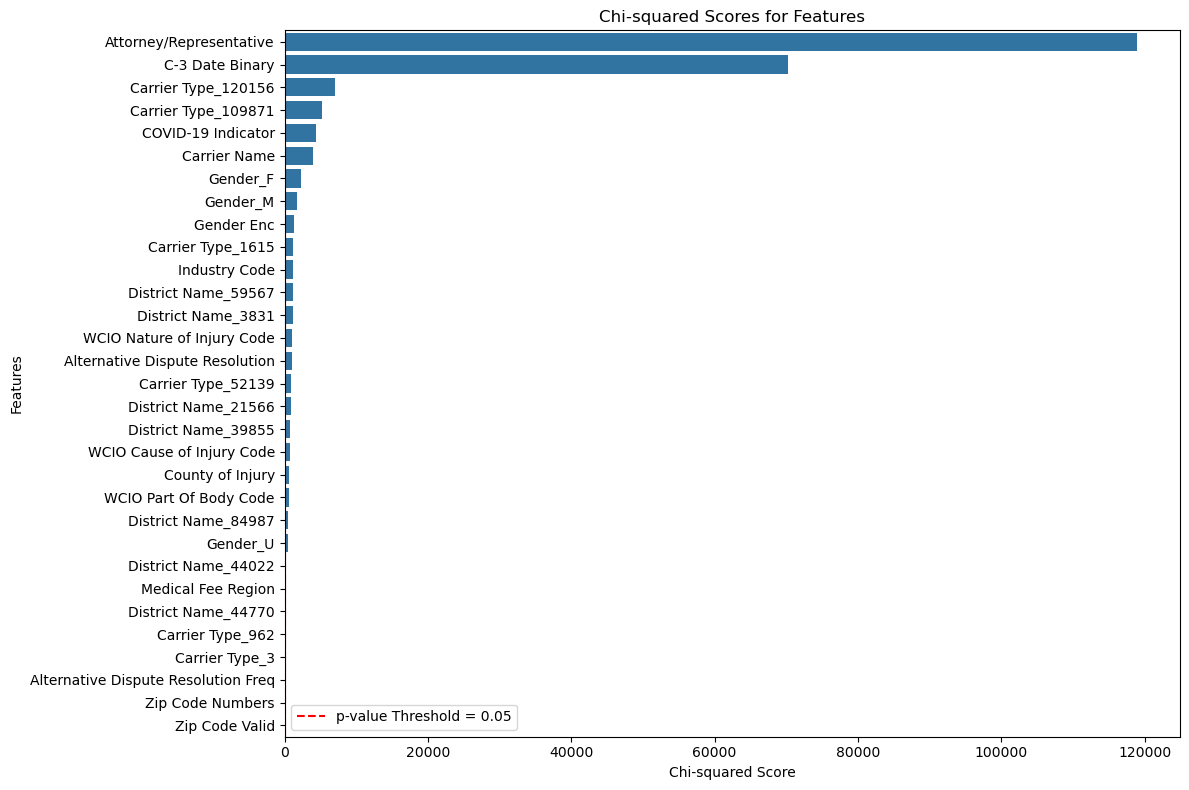


Initial Features: 31

['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'County of Injury', 'COVID-19 Indicator', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution Freq', 'Carrier Type_3', 'Carrier Type_962', 'Carrier Type_1615', 'Carrier Type_52139', 'Carrier Type_109871', 'Carrier Type_120156', 'District Name_3831', 'District Name_21566', 'District Name_39855', 'District Name_44022', 'District Name_44770', 'District Name_59567', 'District Name_84987', 'Gender Enc', 'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 'Zip Code Numbers', 'C-3 Date Binary']

Decision for Categorical Features (p-value < threshold): 28

['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'County of Injury', 'COVID-19 Indicator', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body C

In [153]:
fs.chi_squared(X_train, y_train, categ)

**Not Selected Features**

| Var | Chi2 Score | P-value |
| ----- | ----- | ----------- |
| Alternative Dispute Resolution | 8.856989 | 0.263087 |
| Zip Code Valid | 0.301260 | 0.999899 |
| Zip Code Numbers | 8.229935 | 0.312756 |


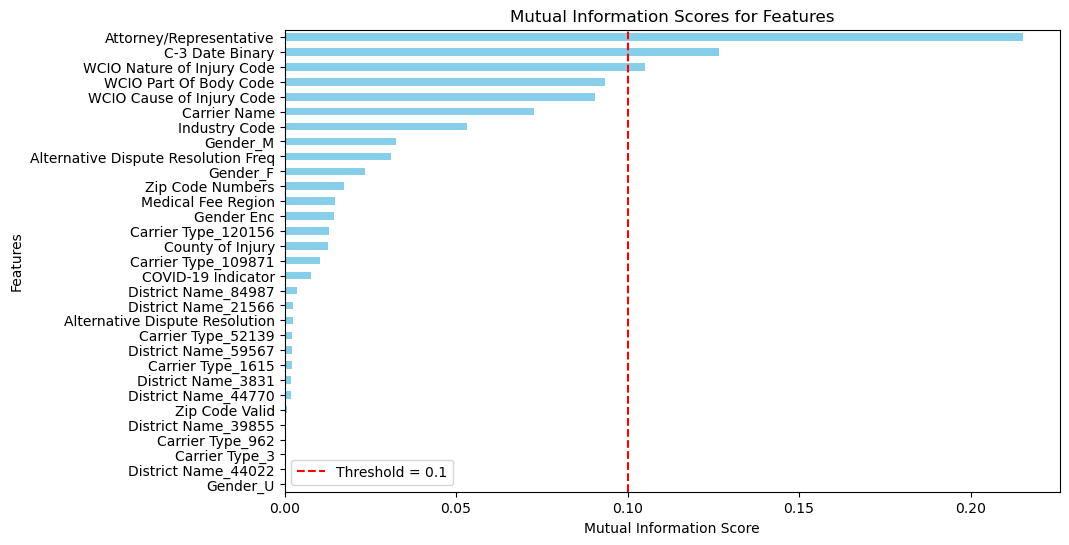


Initial Features: 31 

['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'County of Injury', 'COVID-19 Indicator', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution Freq', 'Carrier Type_3', 'Carrier Type_962', 'Carrier Type_1615', 'Carrier Type_52139', 'Carrier Type_109871', 'Carrier Type_120156', 'District Name_3831', 'District Name_21566', 'District Name_39855', 'District Name_44022', 'District Name_44770', 'District Name_59567', 'District Name_84987', 'Gender Enc', 'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 'Zip Code Numbers', 'C-3 Date Binary']

Decision for Categorical Features (MI Score >= 0.1): 3 

['Attorney/Representative', 'WCIO Nature of Injury Code', 'C-3 Date Binary']


In [154]:
fs.mutual_info(X_train[categ], y_train, threshold = 0.1)

## 4.3 Wrapper Methods

<a href="#top">Top &#129033;</a>

In [ ]:
#len(X_train[num].columns)

**RFE**

In [ ]:
n_features = np.arange(5, len(X_train[num].columns) + 1)
model = LogisticRegression()
fs.rfe(X_train_RS, y_train, n_features = n_features, model = model)

# ~45 min to run

**RFE LR Features**

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Accident Year',
 'Assembly Year',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year',
 'IME-4 Count Log']

In [ ]:
n_features = np.arange(5, len(X_train[num].columns) + 1)
model = RandomForestClassifier()
fs.rfe(X_train_RS, y_train, n_features = n_features, model = model)

# ~4h to run

**RFE RF Features**

## 4.4 Embedded Methods

<a href="#top">Top &#129033;</a>

**Lasso**

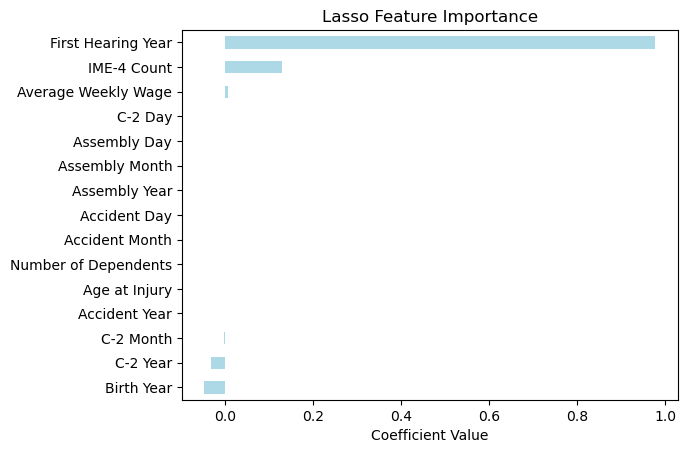


Initial Features: 15

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year', 'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 'C-2 Day', 'First Hearing Year']

Decision for Numerical Features (lasso ≠ 0): 7

['Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Accident Year', 'C-2 Year', 'C-2 Month', 'First Hearing Year']


In [155]:
fs.lasso(X_train_RS, y_train, alpha = 0.01)

**Extra Trees Classifier**

In [156]:
fs.plot_feature_importance(X_train_RS, X_train[categ], y_train, 
                        n_estimators = 250)

KeyboardInterrupt: 

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Accident Year',
 'Assembly Year',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year',
 'IME-4 Count Log']

**Final Decision**

`Numeric Variables`

| Variable                   | Variance | Correlation | RFE LR | RFE RF | Lasso | Extra Trees | `Decision` |
|----------------------------|----------|-------------|--------|--------|-------|-------------|------------|
| Accident Day               | keep     | keep | **discard**  | keep         | **discard** | keep    |-----  |
| Accident Month             | keep     | keep | **discard**  | keep         | **discard** | keep    |-----  |
| Accident Year              | keep     | keep | keep         | keep         | keep        | keep    | keep  |
| Age at Injury              | keep     | ?    | keep         | keep         | **discard** | keep    |-----  |
| Average Weekly Wage        | keep     | keep | keep         | keep         | keep        | keep    | keep  |
| Assembly Day               | keep     | ?    | keep         | keep         | **discard** | keep    |-----  |
| Assembly Month             | keep     | ?    | keep         | keep         | **discard** | keep    |-----  |
| Assembly Year              | keep     | keep | keep         | keep         | **discard** | keep    |-----  |
| Birth Year                 | keep     | ?    | keep         | keep         | keep        | keep    |-----  |
| C-2 Day                    | keep     | ?    | keep         | keep         | **discard** | keep    |-----  |
| C-2 Month                  | keep     | ?    | keep         | keep         | keep        | keep    |keep  |
| C-2 Year                   | keep     | keep | keep         | keep         | keep        | keep    |keep  |
| First Hearing Year         | keep     | keep | keep         | keep         | keep        | keep    |keep  |
| IME-4 Count                | keep     | ?    | keep         | keep         | keep        | keep    |-----  |
| IME-4 Count Log            | keep     | ?    | keep         | keep         | keep        | keep    |-----  |
| Number of Dependents       | keep     | keep | **discard**  | **discard**  | **discard** | keep    |-----  |

<br>

`Categorical Variables`

| Variable                            | Chi-Squared | Extra Trees | MIC                 | Decision |
|-------------------------------------|-------------|-------------|---------------------|----------|
| Alternative Dispute Resolution      | **discard** | **discard** | **discard**         | **discard**         |
| Alternative Dispute Resolution Freq | keep        | **discard** | **discard**         |          |
| Attorney/Representative             | keep        | keep        | keep                | keep         |
| C-3 Date Binary                     | keep        | keep        | keep                | keep         |
| Carrier Name                        | keep        | keep        | **discard**         |          |
| Carrier Type freq                   | keep        | **discard** | **discard**         |          |
| Carrier Type_1A. PRIVATE            | keep        | **discard** | **discard**         |          |
| Carrier Type_2A. SIF                | keep        | **discard** | **discard**         |          |
| Carrier Type_3A. SELF PUBLIC        | keep        | **discard** | **discard**         |          |
| Carrier Type_4A. SELF PRIVATE       | keep        | **discard** | **discard**         |          |
| Carrier Type_5. SPECIAL FUND        | keep        | **discard** | **discard**         |          |
| County of Injury                    | keep        | keep        | **discard**         |          |
| COVID-19 Indicator                  | keep        | **discard** | **discard**         |          |
| District Name freq                  | keep        | keep        | **discard**         |          |
| District Name_ALBANY                | keep        | **discard** | **discard**         |          |
| District Name_BINGHAMTON            | keep        | **discard** | **discard**         |          |
| District Name_BUFFALO               | keep        | **discard** | **discard**         |          |
| District Name_HAUPPAUGE             | keep        | **discard** | **discard**         |          |
| District Name_NYC                   | keep        | **discard** | **discard**         |          |
| District Name_ROCHESTER             | keep        | **discard** | **discard**         |          |
| District Name_STATEWIDE             | keep        | **discard** | **discard**         |          |
| Gender Enc                          | keep        | **discard** | **discard**         |          |
| Gender_F                            | keep        | **discard** | **discard**         |          |
| Gender_M                            | keep        | **discard** | **discard**         |          |
| Gender_U                            | keep        | **discard** | **discard**         |          |
| Industry Code                       | keep        | keep        | **discard**         |          |
| Medical Fee Region                  | keep        | keep        | **discard**         |          |
| WCIO Cause of Injury Code           | keep        | keep        | **discard**         |          |
| WCIO Nature of Injury Code          | keep        | keep        | keep                | keep         |
| WCIO Part Of Body Code              | keep        | keep        | **discard**         |          |
| Zip Code Numbers                    | **discard** | keep        | **discard**         |          |
| Zip Code Valid                      | **discard** | **discard** | **discard**         | **discard**         |


<br> 

`Final Features (Numeric & Categorical)`

| Variable |
| -------- | 
| -------- | 
| -------- | 
| -------- | 

**Final Features**

In [ ]:
final_num = ['Accident Year', 'Average Weekly Wage', 'First Hearing Year']

discard1_num = []

In [ ]:
final_categ = ['Attorney/Representative', 'C-3 Date Binary', 'WCIO Nature of Injury Code']

discard1_categ = ['Carrier Name', 'County of Injury', 'Industry Code', 'Medical Fee Region', 
                  'WCIO Cause of Injury Code', 'WCIO Part Of Body Code']

In [ ]:
X_train_num = X_train_RS[final_num]
X_val_num = X_val_RS[final_num]

In [ ]:
X_train_categ = X_train[final_categ + new + discard2_categ]
X_val_categ = X_val[final_categ + new + discard2_categ]

In [ ]:
X_train_final = pd.concat([X_train_num, X_train_categ], axis=1)
X_val_final = pd.concat([X_val_num, X_val_categ], axis=1)

# 5. Test

<a href="#top">Top &#129033;</a>

In [ ]:
test.describe().T

In [ ]:
test.describe(include = 'object').T

## 5.1 Feature Engineering

<a href="#top">Top &#129033;</a>

<a href="#section3.2">Go to Section 3.2 &#8595;</a>

<a class="anchor" id="section5.1"></a>

### 5.1.1 Data Type Conversions

<a href="#top">Top &#129033;</a>

In [ ]:
test['Accident Date'] = pd.to_datetime(test['Accident Date'], 
                                     errors='coerce')

test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], 
                                     errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'], 
                                errors='coerce')

test['C-3 Date'] = pd.to_datetime(test['C-3 Date'], 
                                errors='coerce')

test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], 
                                          errors='coerce')

### 5.1.2 Encoding

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

In [ ]:
# freq = test['Alternative Dispute Resolution'].value_counts()
# freq

In [ ]:
# test['Alternative Dispute Resolution'] = test['Alternative Dispute Resolution'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [ ]:
encoder = OrdinalEncoder(categories=[['N', 'Y', 'U']])

In [ ]:
test['Alternative Dispute Resolution'] = encoder.fit_transform(test[['Alternative Dispute Resolution']])

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [ ]:
test['Attorney/Representative'].value_counts()

In [ ]:
test['Attorney/Representative'] = test['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

In [ ]:
test['Carrier Name'].nunique()

In [ ]:
freq = test['Carrier Name'].value_counts()

In [ ]:
test['Carrier Name'] = test['Carrier Name'].map(freq)

**Carrier Type**

encode (8 unique values)

In [ ]:
# freq = test['Carrier Type'].value_counts()
# freq

In [ ]:
# test['Carrier Type'] = test['Carrier Type'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [ ]:
mapping = {
        '5D. SPECIAL FUND - UNKNOWN': '5. SPECIAL FUND',
        '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5. SPECIAL FUND',
        '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5. SPECIAL FUND'
    }

In [ ]:
test['Carrier Type'] = test['Carrier Type'].replace(mapping)

In [ ]:
test = pd.get_dummies(test, columns=['Carrier Type'])
test = test.iloc[:, :-1] # drop last column because of redundancy

In [ ]:
dummy_columns = test.filter(like='Carrier Type').columns
test[dummy_columns] = test[dummy_columns].astype(int)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [ ]:
test['County of Injury'].nunique()

In [ ]:
freq = test['County of Injury'].value_counts()

In [ ]:
test['County of Injury'] = test['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [ ]:
test['COVID-19 Indicator'].value_counts()

In [ ]:
test['COVID-19 Indicator'] = test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

encode (8 uniques)

In [ ]:
freq = test['District Name'].value_counts()
freq

In [ ]:
test['District Name'] = test['District Name'].map(freq)

**Gender**

encode ['M' 'F' nan 'U' 'X']

In [ ]:
# test['Gender'].value_counts()

In [ ]:
# test['Gender'] = test['Gender'].map({
#     'M': 0,  # Male
#     'F': 1,  # Female
#     'U': 2,  # Unknown 
#     'X': 2   # Other 
# })

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [ ]:
test = pd.get_dummies(test, columns=['Gender'])

In [ ]:
test = test.iloc[:, :-1] # drop last column because of redundancy

In [ ]:
dummy_columns = test.filter(like='Gender').columns
test[dummy_columns] = test[dummy_columns].astype(int)

**Medical Fee Region**

encode

In [ ]:
freq = test['Medical Fee Region'].value_counts()
freq

In [ ]:
test['Medical Fee Region'] = test['Medical Fee Region'].map(freq)

### 5.1.3 Other Transformations

<a href="#top">Top &#129033;</a>

**Accident Date**

transform into year (maybe month and day too)

In [ ]:
test['Accident Year'] = test['Accident Date'].dt.year
test['Accident Month'] = test['Accident Date'].dt.month
test['Accident Day'] = test['Accident Date'].dt.day

**Assembly Date**

transform into year (maybe month and day too)

In [ ]:
test['Assembly Year'] = test['Assembly Date'].dt.year
test['Assembly Month'] = test['Assembly Date'].dt.month
test['Assembly Day'] = test['Assembly Date'].dt.day

**C-2 Date**

transform into year (maybe month and day too)

In [ ]:
test['C-2 Year'] = test['C-2 Date'].dt.year
test['C-2 Month'] = test['C-2 Date'].dt.month
test['C-2 Day'] = test['C-2 Date'].dt.day

**Zip Code**

transform non-numeric into missing values

In [ ]:
test['Zip Code'] = test['Zip Code'].apply(lambda x: np.nan 
                                      if not str(x).isnumeric() else x)

**Drop Transformed Columns**

In [ ]:
test = test.drop(['Accident Date', 'Assembly Date', 'C-2 Date'], axis = 1)

### 5.1.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [ ]:
injury_cause = test[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_test = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_test.head(2)

In [ ]:
injury_nature = test[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_test = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_test.head(2)

In [ ]:
body_code = test[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_test = body_code.set_index('WCIO Part Of Body Code')


body_code_test.head(2)

In [ ]:
industry_code = test[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_test = industry_code.set_index('Industry Code')


industry_code_test.head(2)

Dropping columns from df

In [ ]:
test = test.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

## 5.2 Missing Values

<a href="#top">Top &#129033;</a>

In [ ]:
test.isna().sum()

**Accident Year, Month, Day**

need to fill before birth year otherwise error

In [ ]:
test['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)
test['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)
test['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)

**Birth Year**

In [ ]:
# Mask for X_val where 'Birth Year' is missing or 0 and other columns are not missing
test_mask = test['Accident Year'].notna() & test['Age at Injury'].notna() & \
           (test['Birth Year'].isna() | (test['Birth Year'] == 0))

# Apply the imputation to X_val based on 'Accident Year' and 'Age at Injury'
test.loc[test_mask, 'Birth Year'] = test['Accident Year'] - test['Age at Injury']


**C-3 Date**

In [ ]:
print(f'There are {len(test[test["C-3 Date"].isna()])} rows with missing values')

In [ ]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
test['C-3 Date Binary'] = test['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [ ]:
print(f'There are {len(test[test["First Hearing Date"].isna()])} rows with missing values')

In [ ]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year
test['First Hearing Year'] = test['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [ ]:
print(f'There are {len(test[test["IME-4 Count"].isna()])} rows with missing values')

In [ ]:
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [ ]:
print(f'There are {len(test[test["OIICS Nature of Injury Description"].isna()])} rows with missing values')

In [ ]:
# size of missing / size of dataset
len(test[test['OIICS Nature of Injury Description'].isna()]) / len(test)

Drop replaced and not needed variables

In [ ]:
test = test.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

**Code Variables** 

(Except zip code)

In [ ]:
columns_to_fill = ['WCIO Cause of Injury Code', 
                   'WCIO Nature of Injury Code', 
                   'WCIO Part Of Body Code', 
                   'Industry Code']

In [ ]:
test[columns_to_fill] = test[columns_to_fill].fillna(0)

**Zip Code**

In [ ]:
test['Zip Code'] = test['Zip Code'].fillna(99999)

**C-2 Year, Month, Day**

In [ ]:
test['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
test['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
test['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

**Average Weekly Wage**

In [ ]:
test['Average Weekly Wage'] = p.ball_tree_impute(test, 'Average Weekly Wage', n_neighbors=5)

**Verify the success**

In [ ]:
test.isna().sum()

## 5.3 Log Transformation

<a href="#top">Top &#129033;</a>

In [ ]:
#test['Carrier Name Log'] = np.log(test['Carrier Name'] + 1)
test['IME-4 Count Log'] = np.log(test['IME-4 Count'] + 1)

## 5.4 Scaling

<a href="#top">Top &#129033;</a>

In [ ]:
test_RS = robust.transform(test[num])
test_RS = pd.DataFrame(test_RS, columns=num, index=test.index)

In [ ]:
test_final = pd.concat([pd.DataFrame(test_RS, columns=test_RS.columns), 
                        test[X_train_categ.columns]], axis=1)


**Check Columns**

In [ ]:
test_final_columns = set(test_final.columns)
X_train_final_columns = set(X_train_final.columns)

columns_in_test_not_in_train = test_final_columns - X_train_final_columns

print("Columns in test_final but not in X_train_final: \n")
print(list(columns_in_test_not_in_train))


# 6. Export

<a href="#top">Top &#129033;</a>

In [ ]:
test_final.to_csv('./project_data/test_treated_scaled.csv')

In [ ]:
X_train_final.to_csv('./project_data/x_train.csv')
X_val_final.to_csv('./project_data/x_val.csv')
y_train.to_csv('./project_data/y_train.csv')
y_val.to_csv('./project_data/y_val.csv')